In [1]:
!pip install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.decomposition import PCA

%matplotlib inline


In [2]:
# to display all columns and rows:
pd.set_option('display.max_columns', None)
data=pd.read_csv("churn.csv")
data.head()

,Unnamed: 0,X1,X12,X13,X14,X15,X17,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X32,X33,X49,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X166,X167,X168,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X211,X212,X213,X214,X215,monthly_lease_X0
0,0,1103.0,1103.0,0,0,1,13,1,16,6,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,2206.0,1,1,1,0,1,0,1,0,0,1,25.0,25.0,25.0,25.0,0,1,42000.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,15.0,0.0,9.0,11.133333,5.0,14.0,1.0,7.0,0.555556,5.0,0.0,9.0,0.0,40004,240,Riverside,CA,40004,Other Socal,B,Garden,suburban,university city,0.0,312.0,16.0,71.0,399.0,0.9535,1144.0,0.007,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,1.0,1.544818,1.000000,1.6625,0.600000,14
1,1,1136.0,1136.0,0,0,1,12,13,15,7,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,0.0,2272.0,1,1,1,0,1,0,0,1,0,1,46.0,46.0,46.0,46.0,0,0,0.0,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,14.0,0.0,2.0,8.214286,4.0,13.0,0.0,16.0,0.176471,7.0,0.0,17.0,1.0,40004,240,Riverside,CA,40004,Other Socal,B,Garden,suburban,university city,0.0,312.0,16.0,71.0,399.0,0.9535,1144.0,0.007,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.0,1.591036,1.000000,1.6625,0.142857,12
2,2,1382.0,1382.0,0,0,1,12,1,14,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,2764.0,3,3,2,1,2,1,1,1,0,2,41.0,44.0,41.0,47.0,1,2,66360.0,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,13.0,0.0,10.0,11.384615,6.0,17.0,1.0,20.0,0.714286,15.0,0.0,21.0,1.0,40004,240,Riverside,CA,40004,Other Socal,B,Garden,suburban,university city,0.0,312.0,16.0,71.0,399.0,0.9535,1144.0,0.007,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,1.0,1.303774,0.666667,1.6625,0.769231,12
3,3,2417.0,1135.0,0,0,1,14,1,13,8,1,0,0,0,0,1,1,0,0,0,0,5,6,2,6,3,0,2,1.666667,0.666667,6,0,0,0,0,0,0,4,0,1,0,0,0,1,0,1.0,0.0,1.0,2270.0,1,1,1,0,1,0,0,0,0,1,28.0,28.0,28.0,28.0,0,1,0.0,9,4,8,0,0,1,1,1,3,714.0,714.0,1.0,1.0,12.0,1.0,8.0,8.666667,2.0,14.0,2.0,54.0,1.293103,43.0,0.0,58.0,4.0,40004,240,Riverside,CA,40004,Other Socal,B,Garden,suburban,university city,0.0,312.0,16.0,71.0,399.0,0.9535,1144.0,0.007,1249.0,1249.0,0.908727,0.908727,0.357143,0.428571,0.142857,0.428571,0.214286,0.0,0.142857,0.119048,0.047619,0.428571,0.0,0.0,0.0,0.0,0.0,0.000000,0.285714,0.000000,0.071429,0.0,0.000000,0.0,0.071429,0.0,4.500000,0.107759,3.583333,0.0,4.833333,0.333333,1.0,1.589636,1.000000,1.6625,0.750000,14
4,4,1405.0,1405.0,0,0,1,12,2,11,7,0,0,0,0,0,1,0,0,0,0,0,3,4,1,4,2,0,1,2.500000,0.500000,4,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0.0,0.0,0.0,2810.0,2,2,2,1,2,0,1,1,0,2,47.0,46.0,45.0,47.0,1,2,57320.0,12,4,16,0,0,1,1,1,3,1041.0,1041.0,2.0,2.0,10.0,0.0,7.0,10.200000,0.0,14.0,3.0,13.0,1.050000,16.0,0.0,20.0,4.0,40004,240,Riverside,CA,40004,Other Socal,B,Garden,suburban,university city,0.0,312.0,16.0,71.0,399.0,0.9535,1144.0,0.007,1472.0,1472.0,0.954484,0.95448

In [3]:
#droping columns based on feature importance
data=data.drop(['Unnamed: 0','X158','X155'],axis=1)
data=data.drop(["X150","X187","X186","X185","X26","X68","X15","X14","X13","X27","X32","X33","X144","X188","X69","X70","X25","X71","X72","X189"],axis=1)

In [4]:
pd.set_option('display.max_row', None)
data.skew(axis = 0, skipna = True)

X1                    2.821999
X12                   1.959757
X17                   0.987515
X19                   2.587440
X20                  -0.293504
X21                   0.281640
X22                   0.064727
X23                   4.872582
X24                  74.405198
Target_ChurnFlag      0.404502
X49                   1.551638
X57                   0.067982
X58                   1.936663
X59                   1.934561
X60                  -0.027613
X61                   1.934561
X62                   2.960385
X63                  10.444043
X64                   2.666199
X65                  12.371404
X66                 196.561246
X67                   2.006119
X73                   2.406187
X74                   2.685346
X75                   2.874505
X76                   3.309171
X77                   3.162826
X78                  30.197956
X79                   5.729648
X80                   4.918378
X81                  17.114328
X82                  -1.361107
X83     

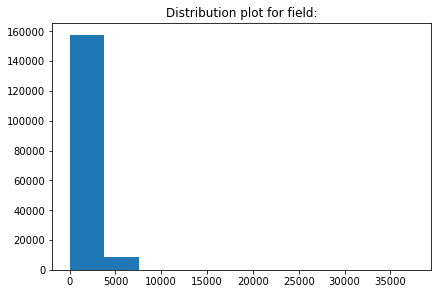

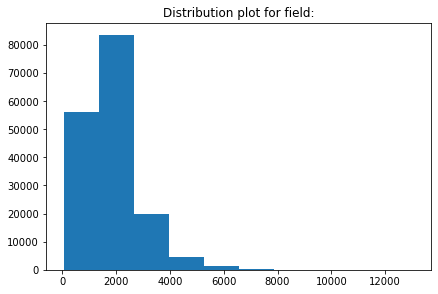

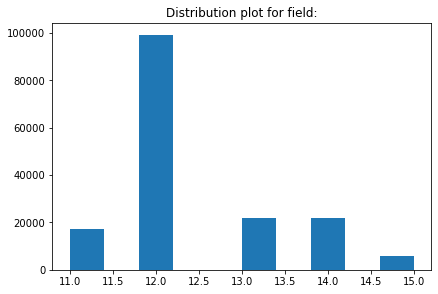

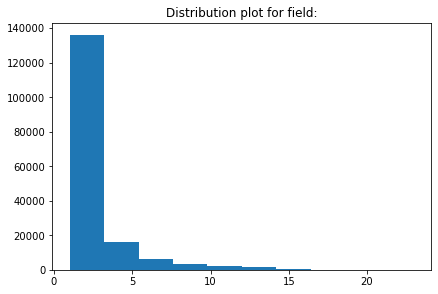

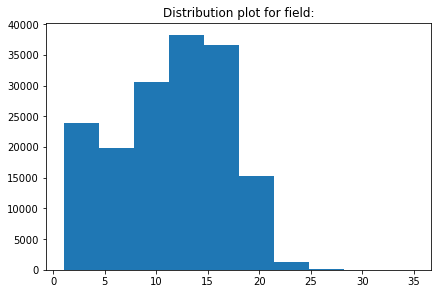

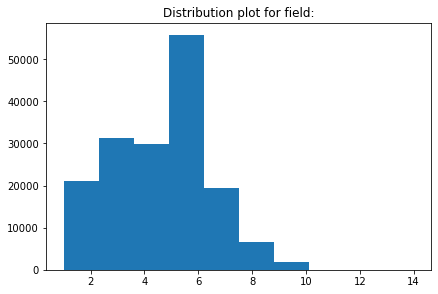

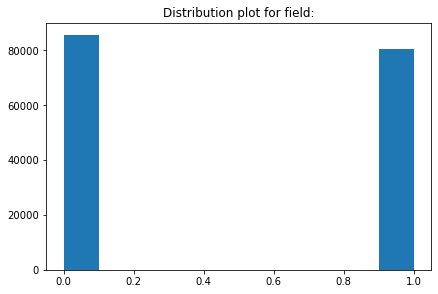

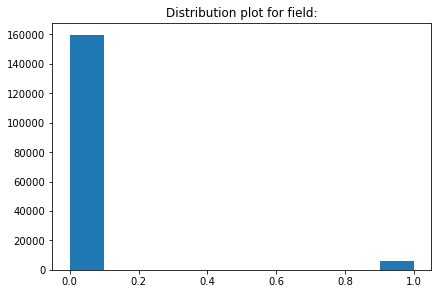

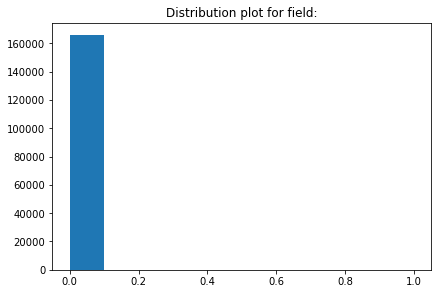

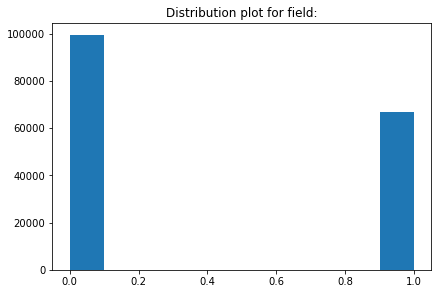

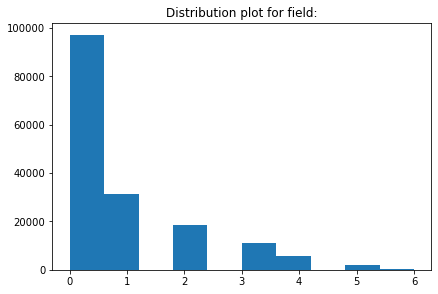

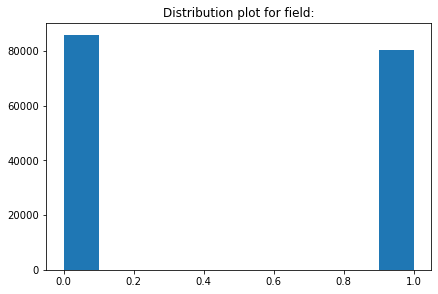

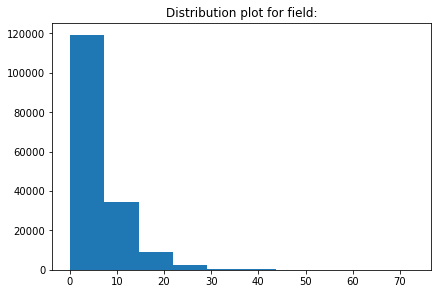

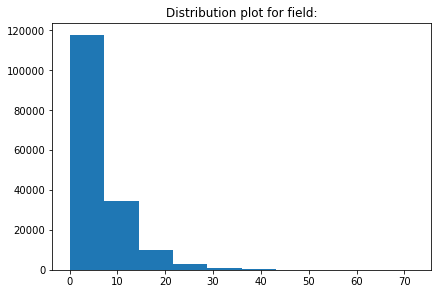

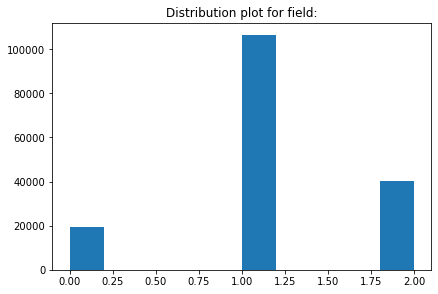

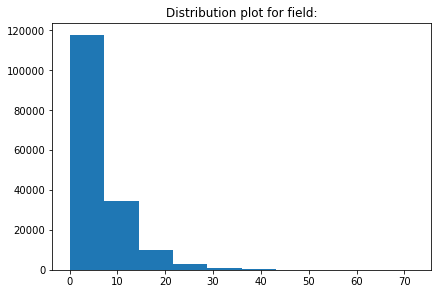

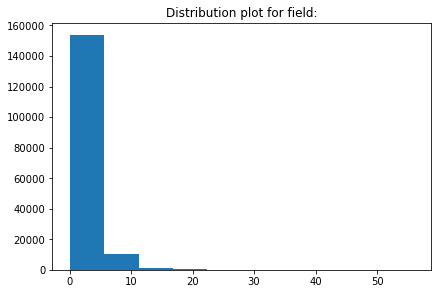

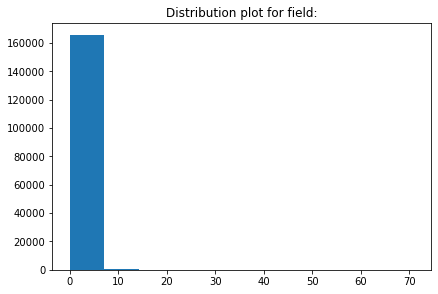

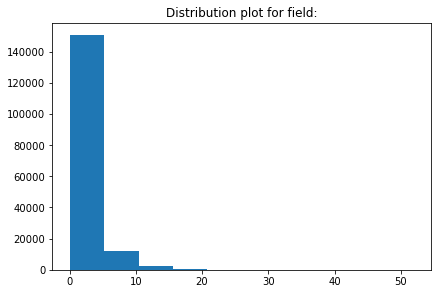

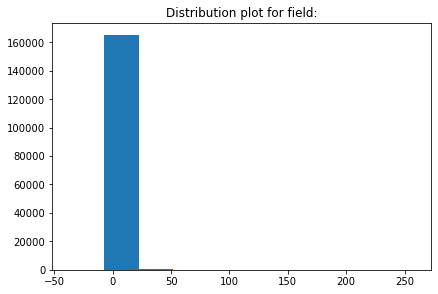

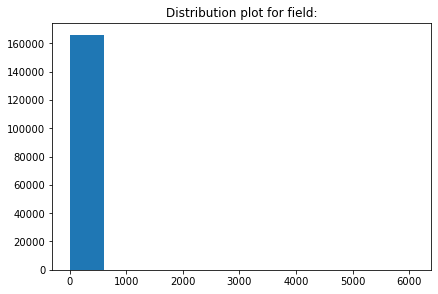

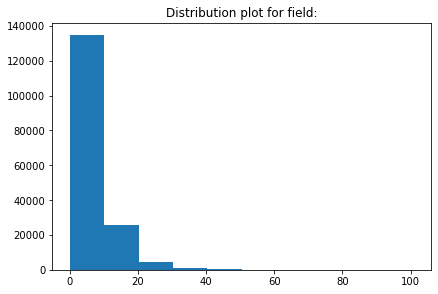

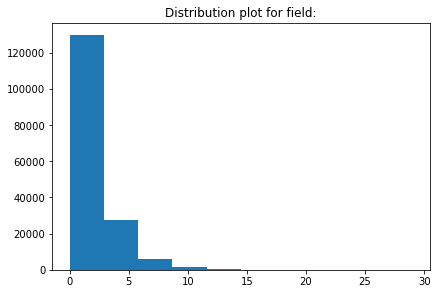

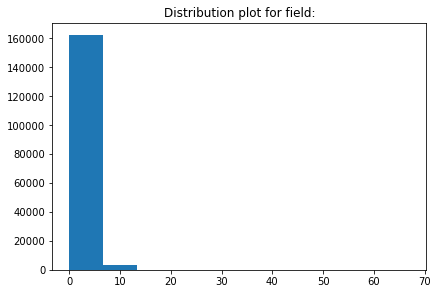

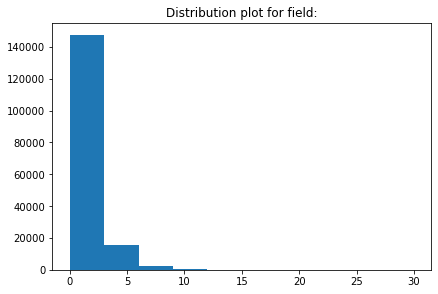

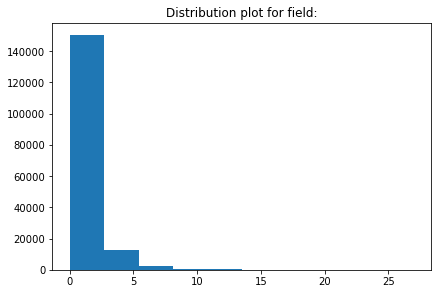

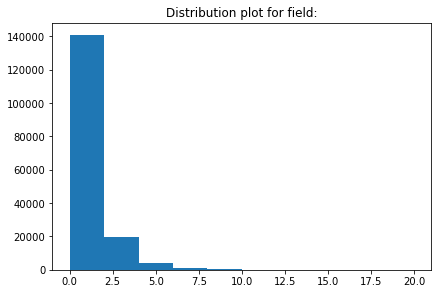

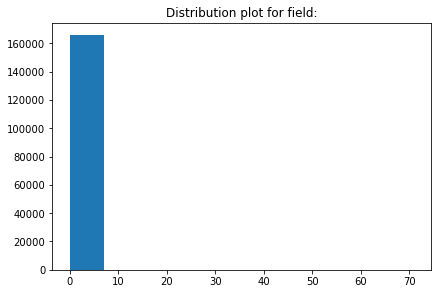

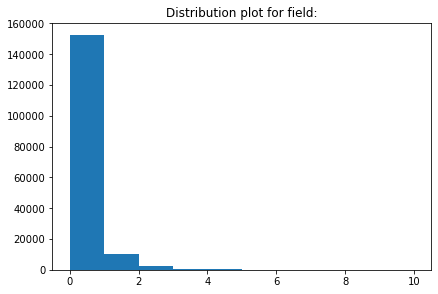

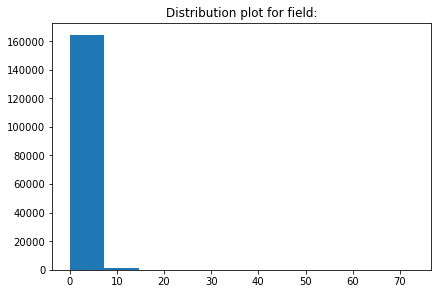

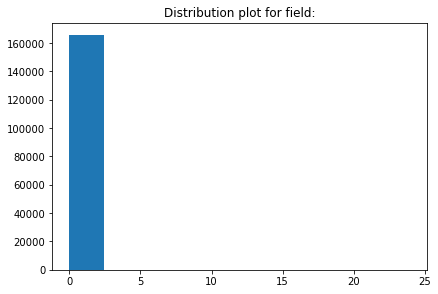

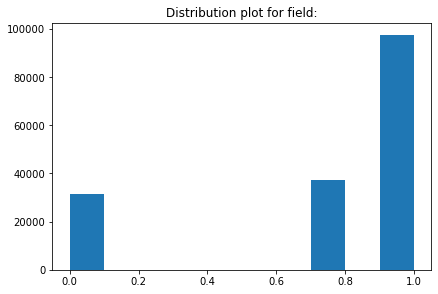

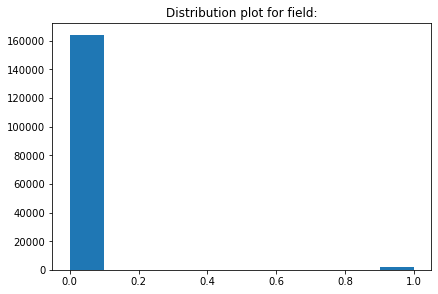

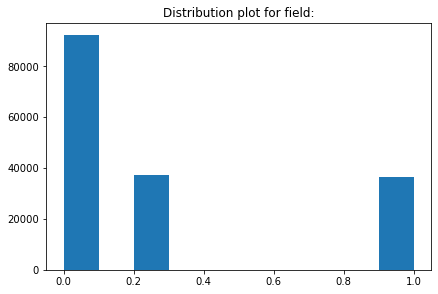

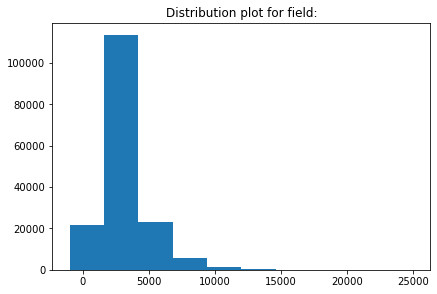

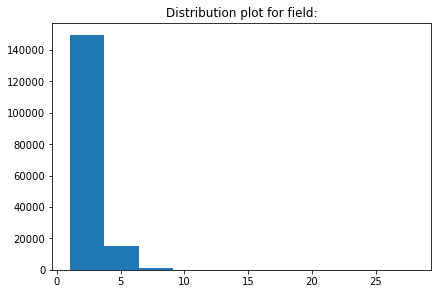

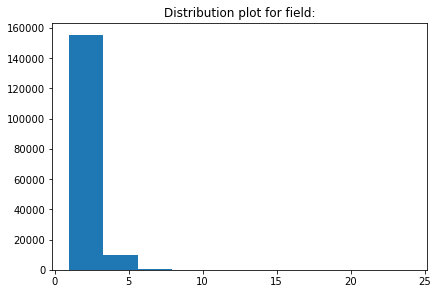

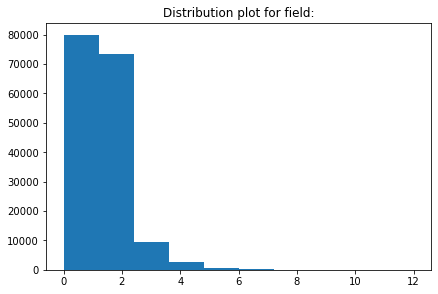

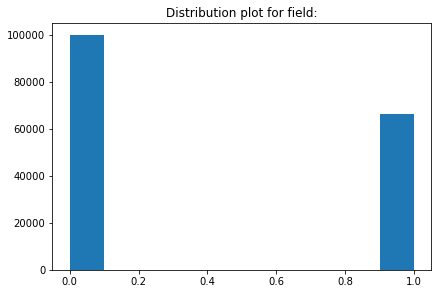

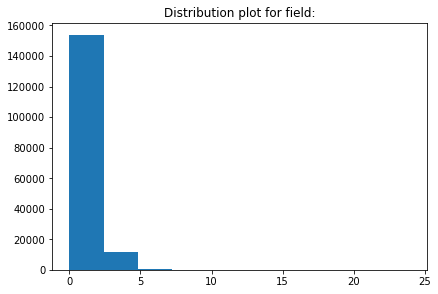

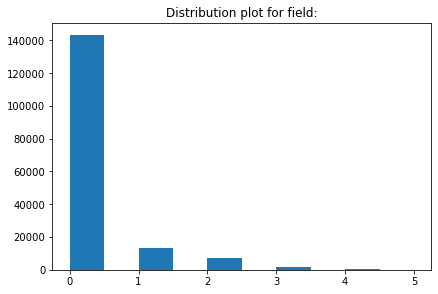

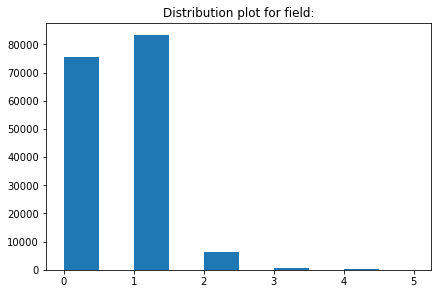

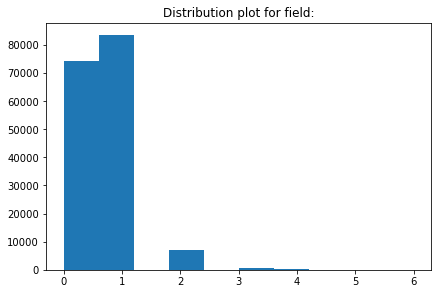

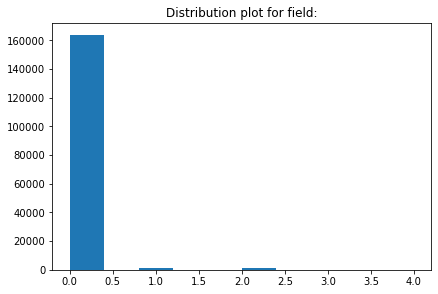

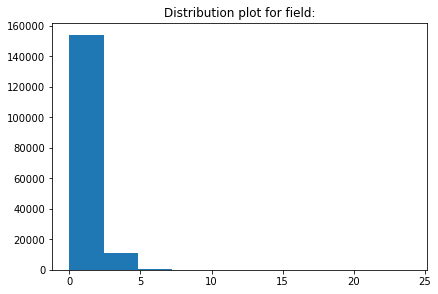

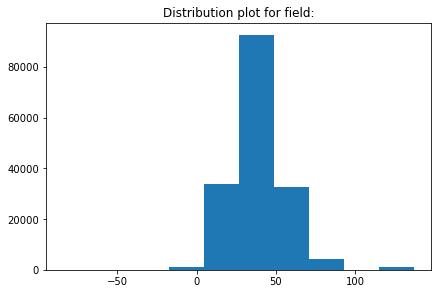

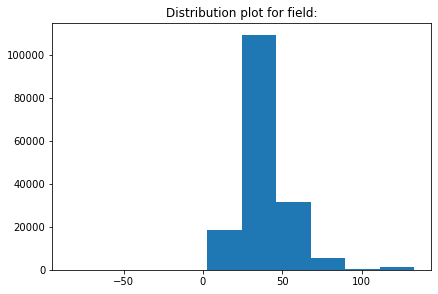

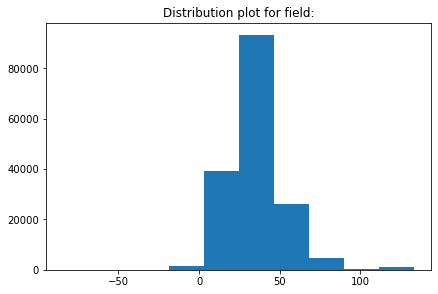

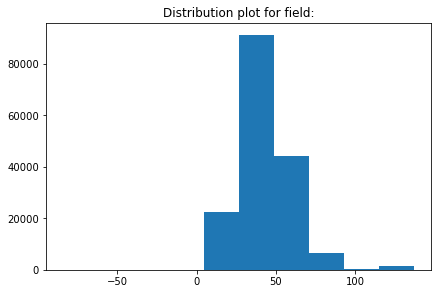

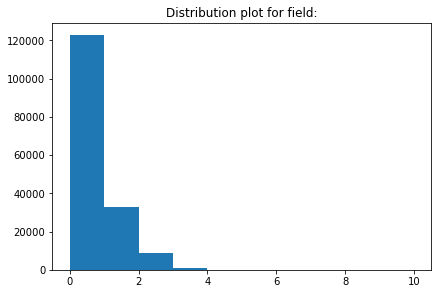

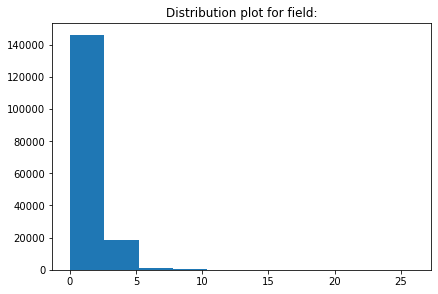

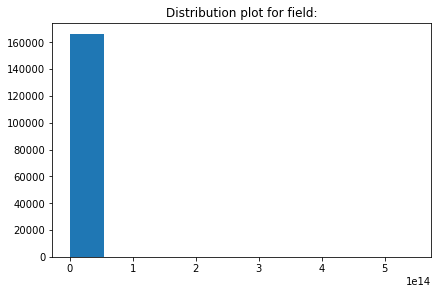

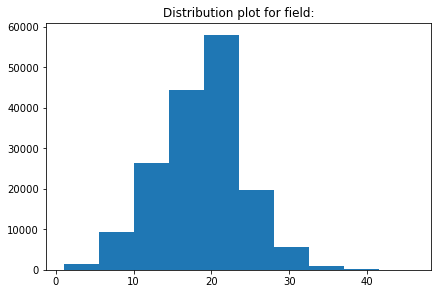

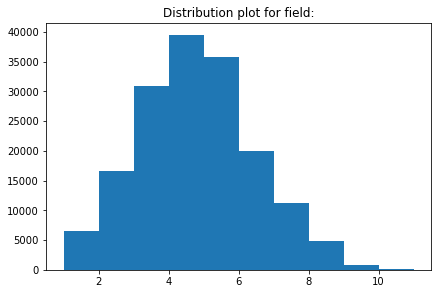

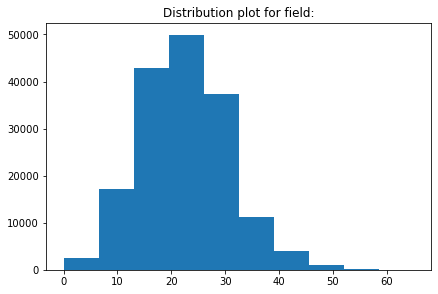

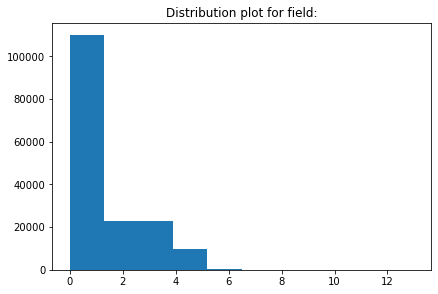

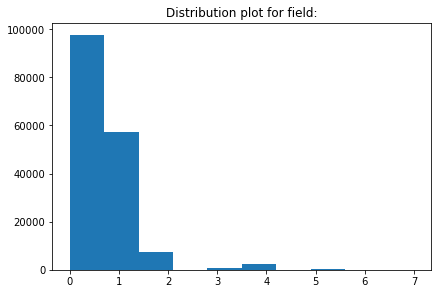

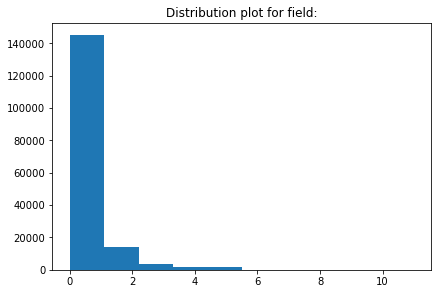

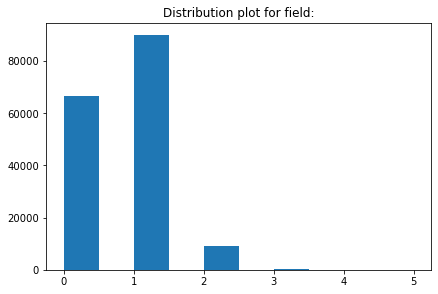

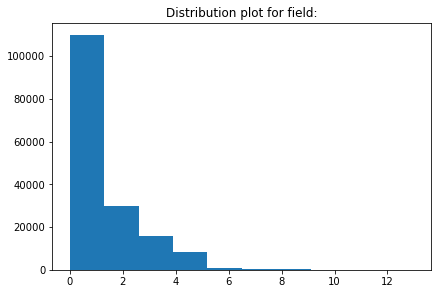

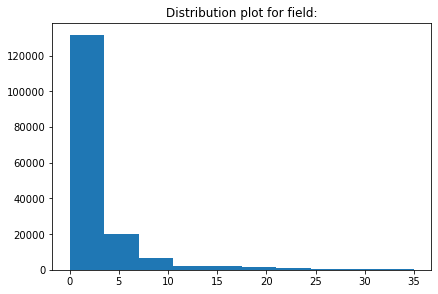

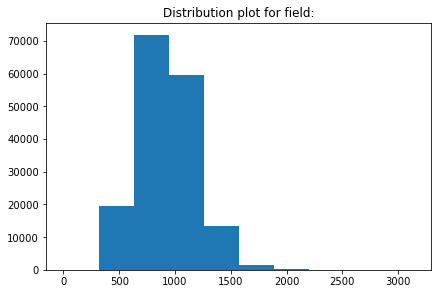

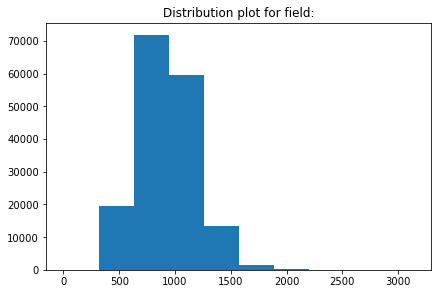

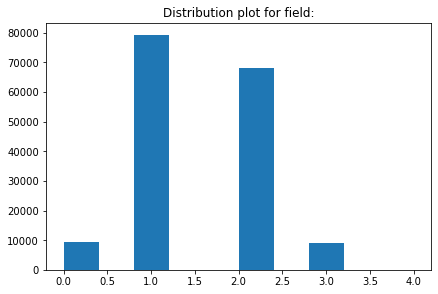

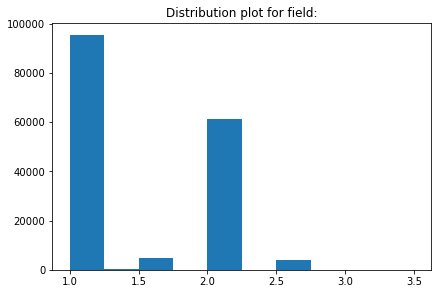

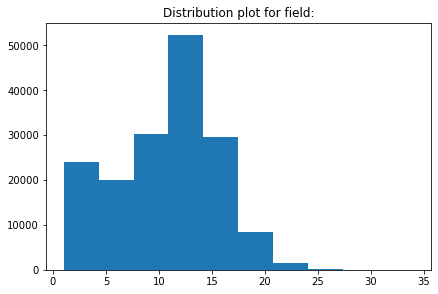

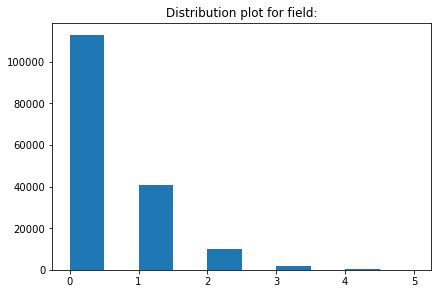

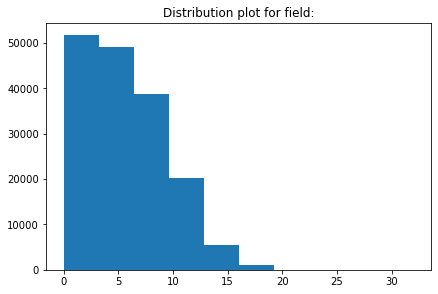

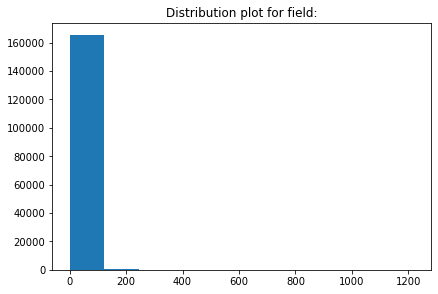

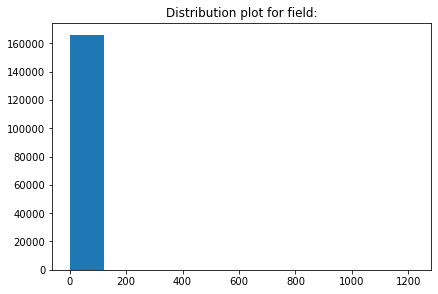

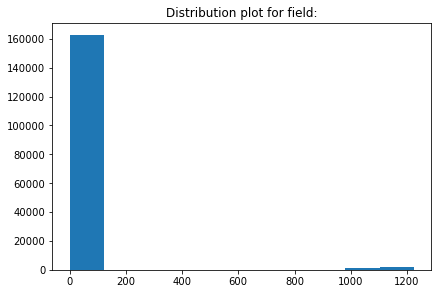

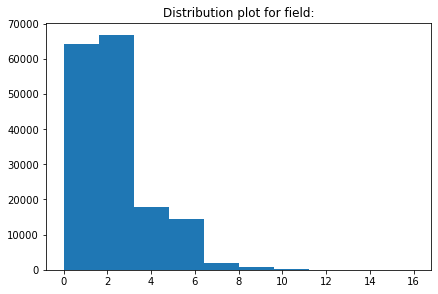

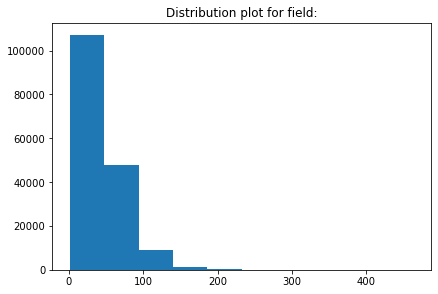

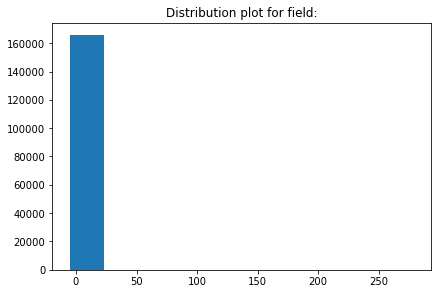

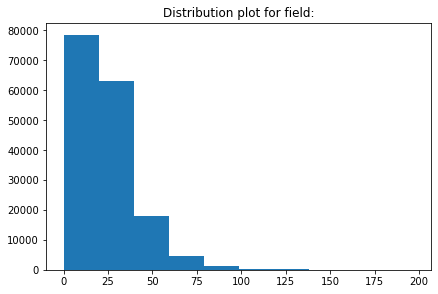

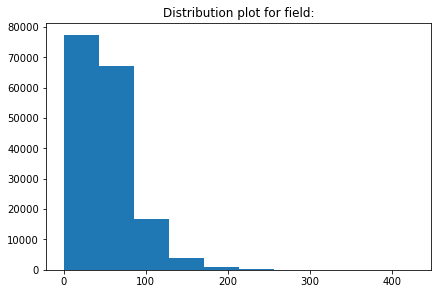

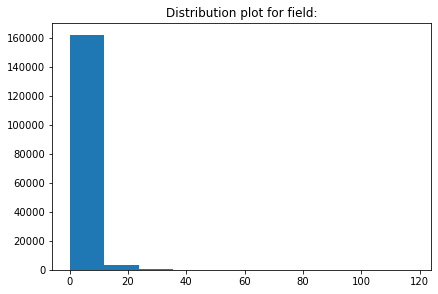

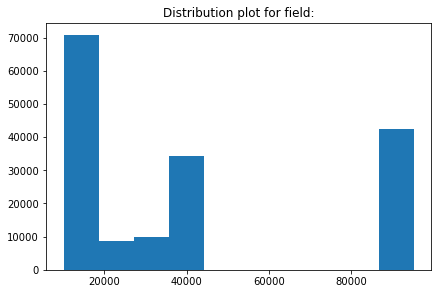

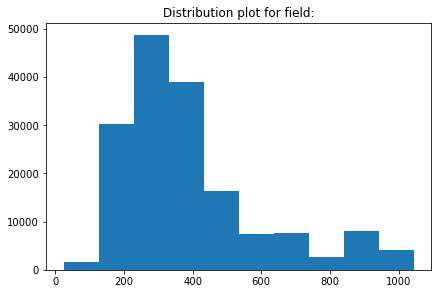

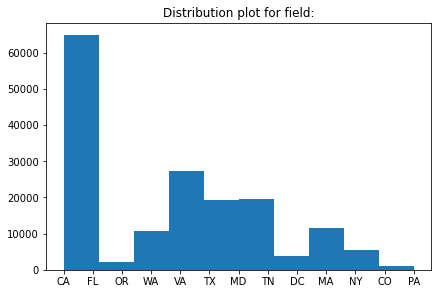

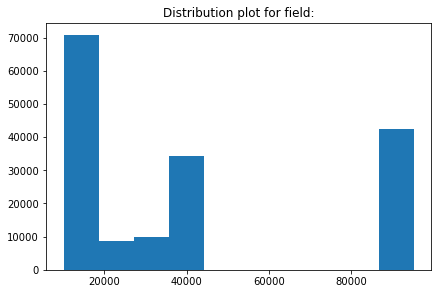

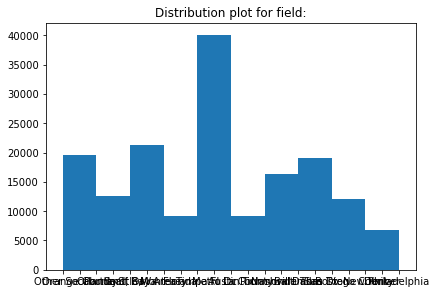

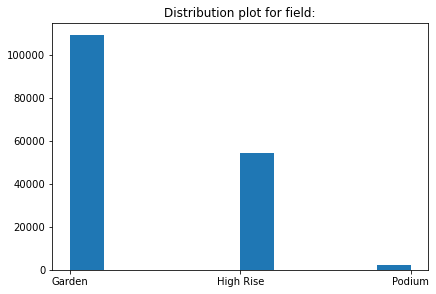

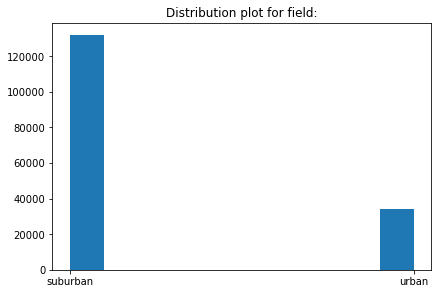

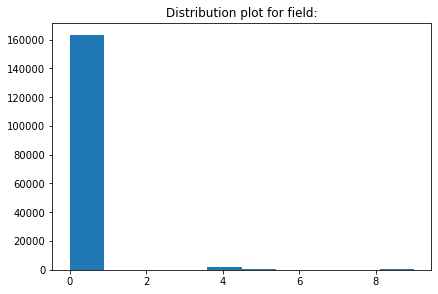

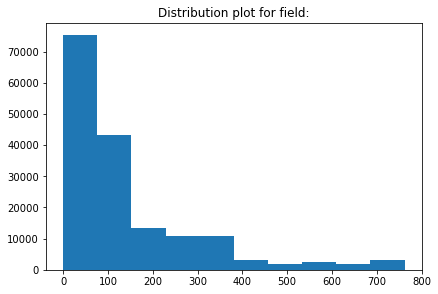

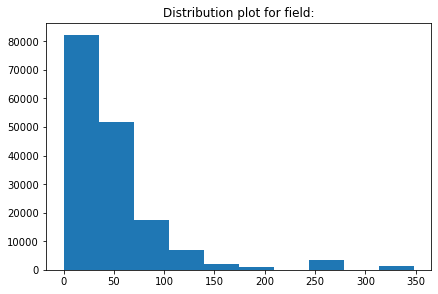

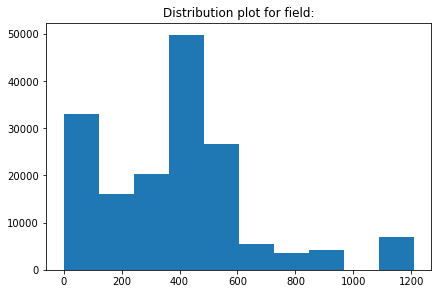

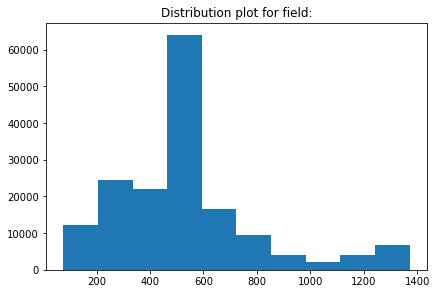

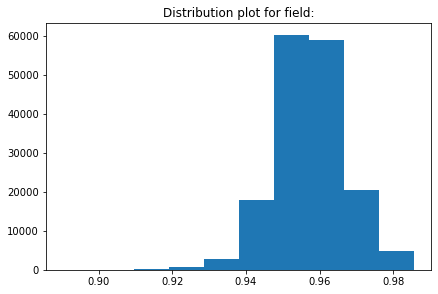

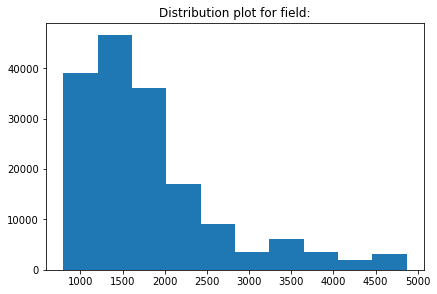

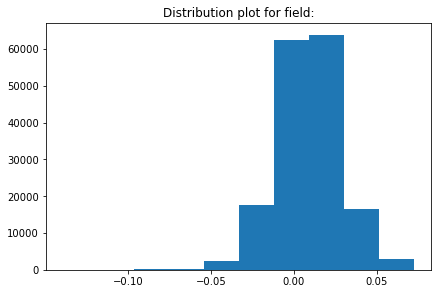

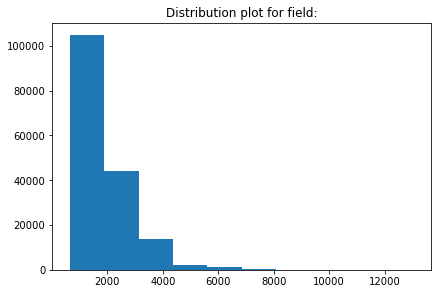

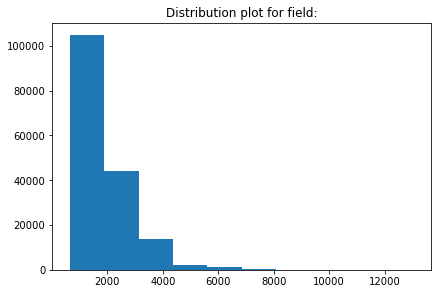

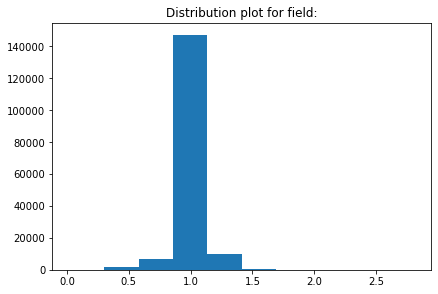

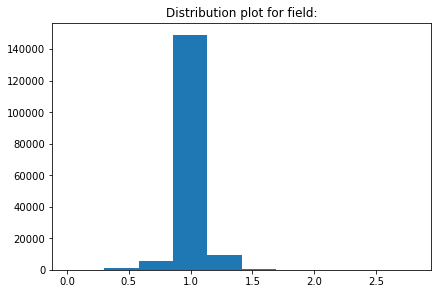

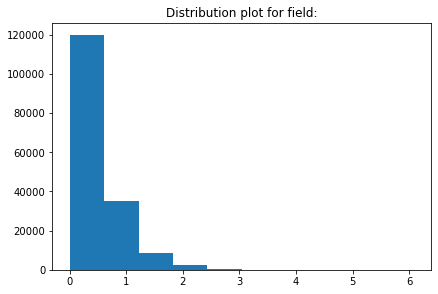

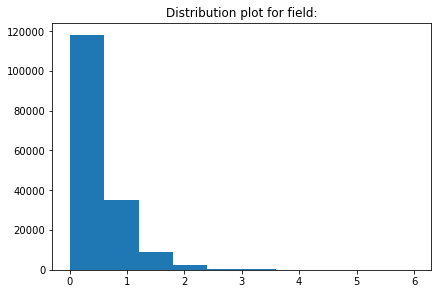

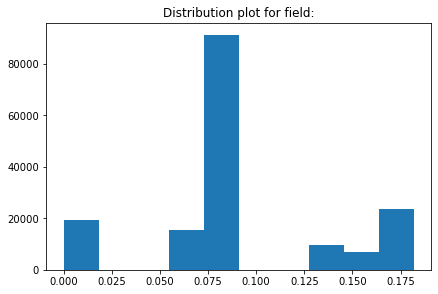

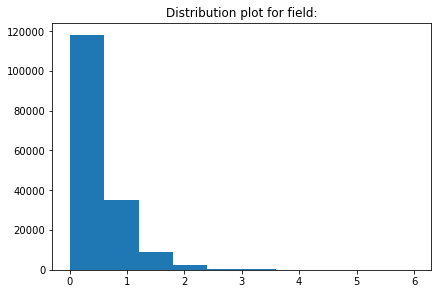

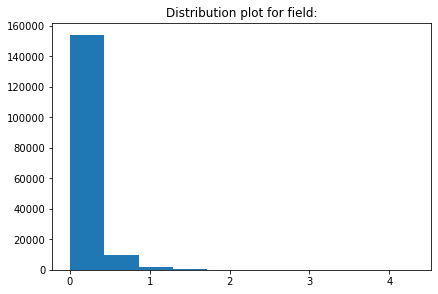

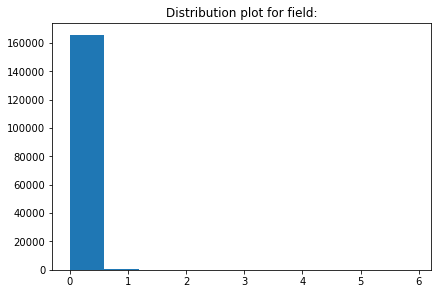

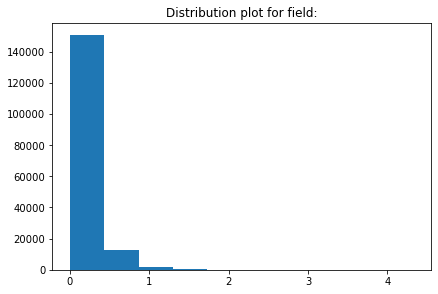

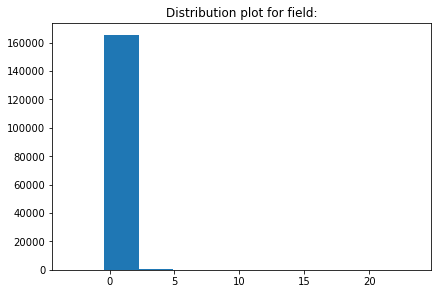

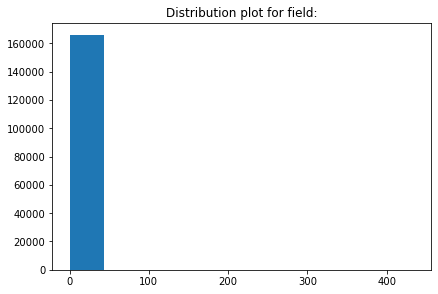

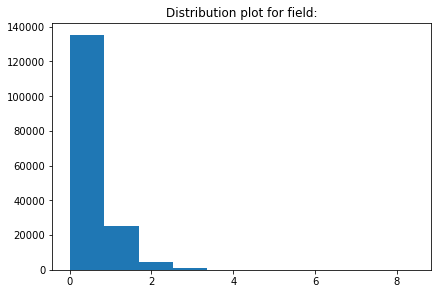

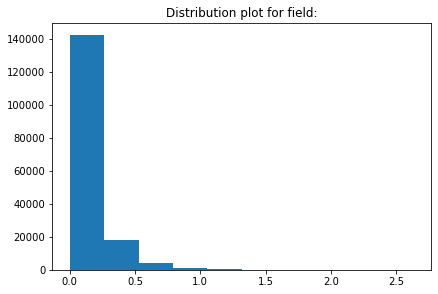

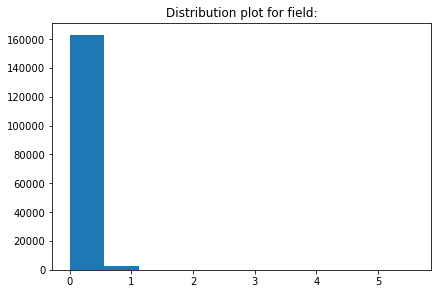

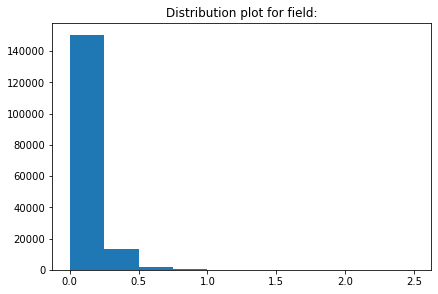

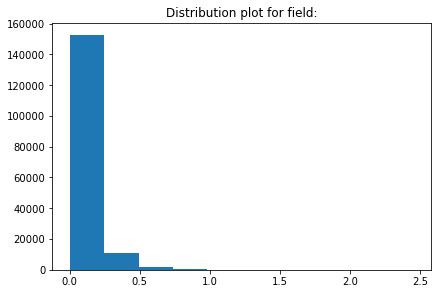

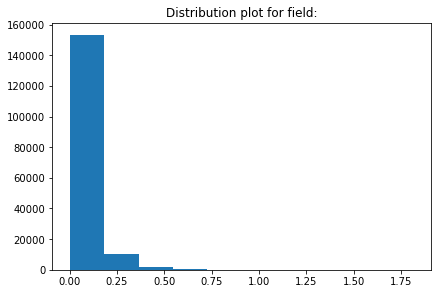

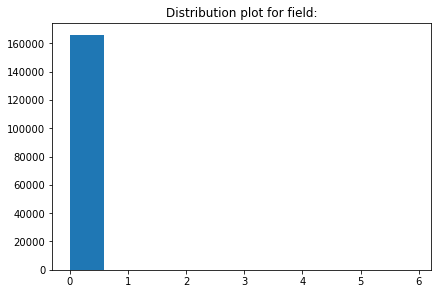

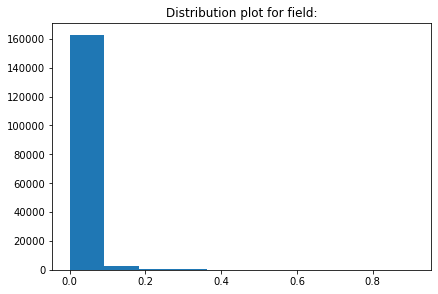

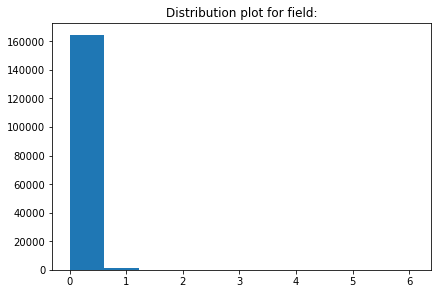

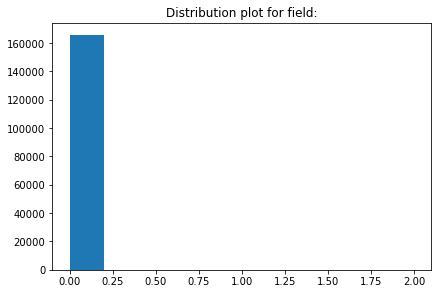

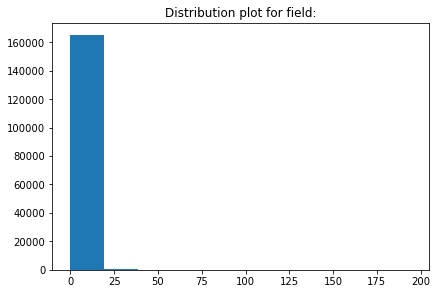

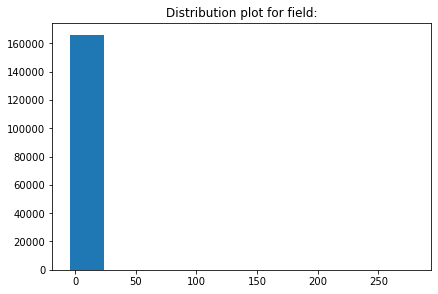

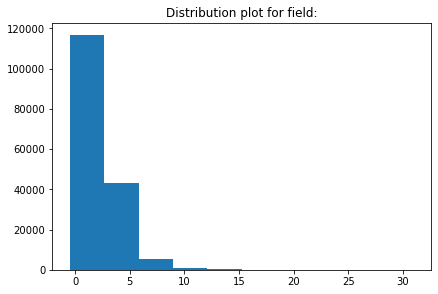

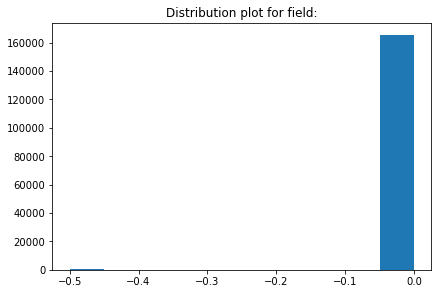

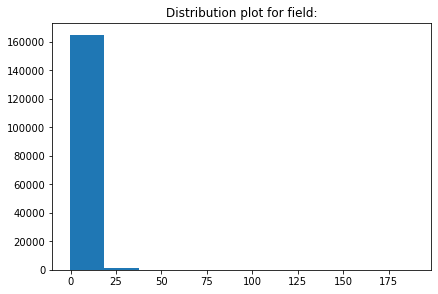

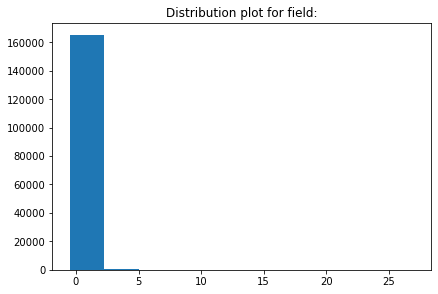

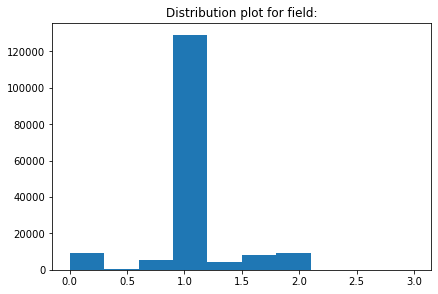

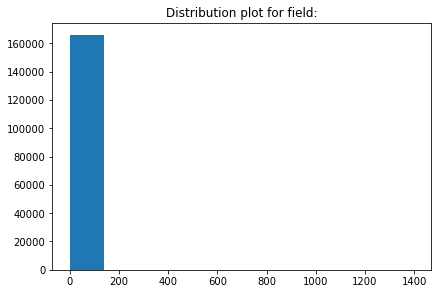

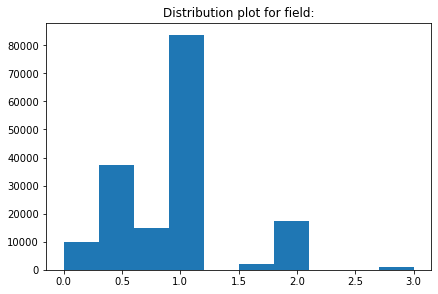

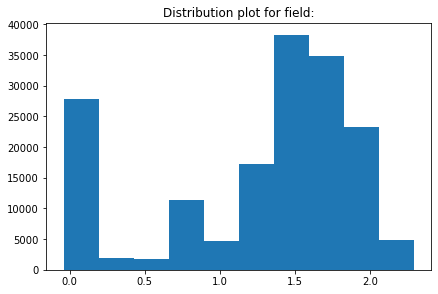

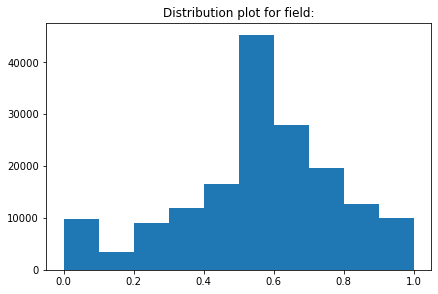

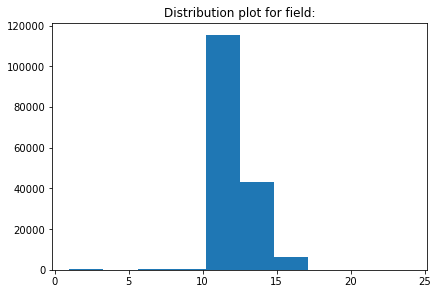

In [8]:
import warnings
warnings.filterwarnings("ignore") 
for column in data:
    plt.figure(figsize=(6,4))
    plt.hist(data[column])
    plt.title('Distribution plot for field:')
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [ ]:
# full correlation table
data.corr().style.background_gradient(cmap='viridis')

In [6]:
data.shape

(166171, 127)

In [4]:
cat_col=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_col.append(col)
cat_col        

['X151', 'X154', 'X156', 'X157']

In [6]:
data['X151'].unique()

array(['CA', 'FL', 'OR', 'WA', 'VA', 'TX', 'MD', 'TN', 'DC', 'MA', 'NY',
       'CO', 'PA'], dtype=object)

In [5]:
num_col=[]
for col in data.columns:
    if data[col].dtype=='int' or data[col].dtype=='float':
        num_col.append(col)
        
num_col     

['X1',
 'X12',
 'X65',
 'X66',
 'X82',
 'X83',
 'X84',
 'X85',
 'X98',
 'X102',
 'X103',
 'X104',
 'X107',
 'X118',
 'X119',
 'X120',
 'X121',
 'X134',
 'X135',
 'X136',
 'X137',
 'X138',
 'X139',
 'X140',
 'X141',
 'X142',
 'X143',
 'X145',
 'X146',
 'X159',
 'X160',
 'X161',
 'X162',
 'X163',
 'X166',
 'X167',
 'X168',
 'X171',
 'X172',
 'X173',
 'X174',
 'X175',
 'X176',
 'X177',
 'X178',
 'X179',
 'X180',
 'X181',
 'X182',
 'X183',
 'X184',
 'X190',
 'X191',
 'X192',
 'X193',
 'X194',
 'X195',
 'X196',
 'X197',
 'X198',
 'X199',
 'X200',
 'X201',
 'X202',
 'X203',
 'X204',
 'X211',
 'X212',
 'X213',
 'X214',
 'X215']

In [6]:
# dummy encode the categorical columns
data = pd.concat([data,pd.get_dummies(data[cat_col], drop_first=True)], axis=1)

# drop the original columns
data.drop(cat_col, axis=1, inplace=True)

In [7]:
# prepare the dataset
X = data.drop('Target_ChurnFlag', axis=1)
y = data['Target_ChurnFlag']

### Split into train test

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=12)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(124628, 157) (124628,)
(41543, 157) (41543,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled.shape,X_test_scaled.shape

((124628, 157), (41543, 157))

### Feature Importance

In [10]:
dc=DecisionTreeClassifier()
dc.fit(X,y)

DecisionTreeClassifier()

In [17]:
pd.set_option('display.max_row', None)
dc.feature_importances_
df=pd.DataFrame({"Feature_names":X.columns,"importance":dc.feature_importances_})
df.sort_values(by="importance",ascending=False)


,Feature_names,importance
57,X98,0.042713
46,X85,0.030569
100,X168,0.024448
136,X212,0.024447
6,X19,0.022879
0,X1,0.022291
80,X137,0.021174
130,X200,0.020996
104,X174,0.019589
139,X215,0.019457


X187,X186,X185,X26,X150_Richmond,X154_Denver,X68,X15,X14,X13,X27,X32,X150_Brooklyn,X33,X144,X188,X69,X70,X25,X150_Waltham,X71,X72,X189,X150_Mission Viejo

In [11]:
X_train_scaled.shape

(124628, 252)

In [11]:
#initialize the pca with randomized
pca = PCA(random_state=12)
# fit the training dataset
pca.fit(X_train_scaled)

PCA(random_state=12)

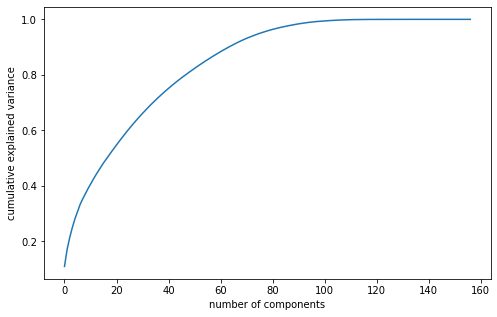

In [12]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [12]:
# Initialize pca preserving 95% of the variability in data
pca = PCA(n_components=0.95,random_state=12)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train_scaled)
# transform the testing dataset
X_test_pca = pca.transform(X_test_scaled)


In [45]:
X_train_pca.shape,X_test_pca.shape

((124628, 77), (41543, 77))

In [11]:
!pip install hickle

In [13]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Logistic Regression

In [17]:
# Initialize the Logistic regression
model1 = LogisticRegression(random_state=12,n_jobs=-1)
# fit the pca training data
model1.fit(X_train_pca, Y_train)
train_hat1=model1.predict(X_train_pca)
# predict the testing pca data
Y_pred = model1.predict(X_test_pca)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat1)
print('test accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

train accuracy: 
Accuracy Score :  63.06
ROC AUC score :  57.8
Precision score :  56.89
Recall score :  31.51
test accuracy: 
Accuracy Score :  62.81
ROC AUC score :  57.85
Precision score :  57.01
Recall score :  32.07


## SVC

In [ ]:
# initialize the SVC rbf kernel
model_SVC = SVC(kernel='rbf', random_state=12)
# fit the pca training data
model_SVC.fit(X_train_pca, Y_train)
train_hat2=model_SVC.predict(X_train_pca)

# predict the pca testing data
Y_pred = model_SVC.predict(X_test_pca)

# Model evaluation
print('train accuracy: ')
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat2)
print('test accuracy: ' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)

## RandomForest

In [18]:
# initialize the randomforest
model = RandomForestClassifier(random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

train accuracy
Accuracy Score :  100.0
ROC AUC score :  100.0
Precision score :  100.0
Recall score :  100.0
test accuracy
Accuracy Score :  62.38
ROC AUC score :  56.66
Precision score :  57.23
Recall score :  26.94


In [15]:

# initialize the randomforest
model = RandomForestClassifier(max_depth=5,max_features=0.35,random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

train accuracy
Accuracy Score :  61.15
ROC AUC score :  51.9
Precision score :  66.67
Recall score :  5.71
test accuracy
Accuracy Score :  60.75
ROC AUC score :  51.83
Precision score :  66.79
Recall score :  5.5


## GradientBoosting

In [30]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=12)
# fit the pca training data
model.fit(X_train_pca, Y_train)
train_hat=model.predict(X_train_pca)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
#model_score_list.append({'model_name':'GradientBoostingClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

train accuracy
Accuracy Score :  63.17
ROC AUC score :  56.4
Precision score :  60.65
Recall score :  22.54
test accuracy
Accuracy Score :  62.18
ROC AUC score :  55.71
Precision score :  58.32
Recall score :  22.1


## XGBoosting

In [27]:
# Initialize the XGBoost
model5 = XGBClassifier(random_state=12,n_jobs=-1)
# fit the pca training data
model5.fit(X_train_pca, Y_train)
train_hat=model5.predict(X_train_pca)
# predict the pca testing data
Y_pred = model5.predict(X_test_pca)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
#model_score_list.append({'model_name':'XGBClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

C:\Users\VIVEK KR\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy
Accuracy Score :  74.0
ROC AUC score :  70.48
Precision score :  74.72
Recall score :  52.89
test accuracy
Accuracy Score :  62.87
ROC AUC score :  58.75
Precision score :  56.0
Recall score :  37.41


In [17]:
# Initialize the XGBoost
model5 = XGBClassifier(random_state=12,n_jobs=-1)
# fit the pca training data
model5.fit(X_train_scaled, Y_train)
train_hat=model5.predict(X_train_scaled)
# predict the pca testing data
Y_pred = model5.predict(X_test_scaled)

# Model evaluation
print('train accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
print('test accuracy' )
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)

[12:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy
Accuracy Score :  73.85
ROC AUC score :  70.52
Precision score :  73.66
Recall score :  53.88
test accuracy
Accuracy Score :  66.96
ROC AUC score :  63.46
Precision score :  62.52
Recall score :  45.32


## KNN

In [14]:
# initialize the KNeighbors classifiers
model_knn = KNeighborsClassifier(n_jobs=-1)
# fit the pca training data
model_knn.fit(X_train_pca, Y_train)
train_hat=model_knn.predict(X_train_pca)
# predict the pca testing data
Y_pred = model_knn.predict(X_test_pca)


# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_train, train_hat)
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
#model_score_list.append({'model_name':'KNeighborsClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  73.69
ROC AUC score :  71.28
Precision score :  70.29
Recall score :  59.26
Accuracy Score :  59.19
ROC AUC score :  56.24
Precision score :  49.34
Recall score :  40.9


In [37]:
import lightgbm as lgb

In [51]:
#d_train = lgb.Dataset(X_train_pca, label=Y_train)
train_data = lgb.Dataset(X_train_pca, label=Y_train)
valid_data = lgb.Dataset(X_test_pca, label=Y_test)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
model_lgbm  = lgb.train(params, d_train,valid_sets=valid_data,num_boost_round=10000)

[LightGBM] [Info] Number of positive: 49845, number of negative: 74783
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19635
[LightGBM] [Info] Number of data points in the train set: 124628, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399950 -> initscore=-0.405672
[LightGBM] [Info] Start training from score -0.405672
[1]	valid_0's auc: 0.579146
[2]	valid_0's auc: 0.586304
[3]	valid_0's auc: 0.600317
[4]	valid_0's auc: 0.60856
[5]	valid_0's auc: 0.607755
[6]	valid_0's auc: 0.610602
[7]	valid_0's auc: 0.613574
[8]	valid_0's auc: 0.616495
[9]	valid_0's auc: 0.616519
[10]	valid_0's auc: 0.619142
[11]	valid_0's auc: 0.621757
[12]	valid_0's auc: 0.621809
[13]	valid_0's auc: 0.621803
[14]	valid_0's auc: 0.620555
[15]	valid_0's auc: 0.621183
[16]	valid_0's auc: 0.621877
[17]	valid_0's auc: 0.622283
[18]	valid_0's auc

[270]	valid_0's auc: 0.630578
[271]	valid_0's auc: 0.630584
[272]	valid_0's auc: 0.630558
[273]	valid_0's auc: 0.630577
[274]	valid_0's auc: 0.630549
[275]	valid_0's auc: 0.63058
[276]	valid_0's auc: 0.630612
[277]	valid_0's auc: 0.630637
[278]	valid_0's auc: 0.6307
[279]	valid_0's auc: 0.630756
[280]	valid_0's auc: 0.630792
[281]	valid_0's auc: 0.630793
[282]	valid_0's auc: 0.630859
[283]	valid_0's auc: 0.630853
[284]	valid_0's auc: 0.63093
[285]	valid_0's auc: 0.63092
[286]	valid_0's auc: 0.630917
[287]	valid_0's auc: 0.630952
[288]	valid_0's auc: 0.630989
[289]	valid_0's auc: 0.631005
[290]	valid_0's auc: 0.631011
[291]	valid_0's auc: 0.631036
[292]	valid_0's auc: 0.63101
[293]	valid_0's auc: 0.631053
[294]	valid_0's auc: 0.631024
[295]	valid_0's auc: 0.631086
[296]	valid_0's auc: 0.631093
[297]	valid_0's auc: 0.631137
[298]	valid_0's auc: 0.631123
[299]	valid_0's auc: 0.631146
[300]	valid_0's auc: 0.63124
[301]	valid_0's auc: 0.631232
[302]	valid_0's auc: 0.631287
[303]	valid_0's a

[551]	valid_0's auc: 0.636761
[552]	valid_0's auc: 0.636769
[553]	valid_0's auc: 0.636817
[554]	valid_0's auc: 0.63685
[555]	valid_0's auc: 0.636867
[556]	valid_0's auc: 0.6369
[557]	valid_0's auc: 0.636914
[558]	valid_0's auc: 0.636946
[559]	valid_0's auc: 0.636967
[560]	valid_0's auc: 0.636981
[561]	valid_0's auc: 0.637013
[562]	valid_0's auc: 0.637032
[563]	valid_0's auc: 0.637066
[564]	valid_0's auc: 0.637087
[565]	valid_0's auc: 0.637096
[566]	valid_0's auc: 0.637136
[567]	valid_0's auc: 0.637151
[568]	valid_0's auc: 0.637151
[569]	valid_0's auc: 0.637169
[570]	valid_0's auc: 0.637184
[571]	valid_0's auc: 0.637221
[572]	valid_0's auc: 0.637233
[573]	valid_0's auc: 0.637247
[574]	valid_0's auc: 0.637252
[575]	valid_0's auc: 0.637269
[576]	valid_0's auc: 0.637293
[577]	valid_0's auc: 0.637332
[578]	valid_0's auc: 0.637372
[579]	valid_0's auc: 0.637413
[580]	valid_0's auc: 0.637427
[581]	valid_0's auc: 0.637444
[582]	valid_0's auc: 0.637477
[583]	valid_0's auc: 0.637503
[584]	valid_0

[831]	valid_0's auc: 0.642396
[832]	valid_0's auc: 0.642402
[833]	valid_0's auc: 0.642415
[834]	valid_0's auc: 0.642445
[835]	valid_0's auc: 0.642443
[836]	valid_0's auc: 0.642465
[837]	valid_0's auc: 0.642488
[838]	valid_0's auc: 0.642501
[839]	valid_0's auc: 0.642524
[840]	valid_0's auc: 0.642543
[841]	valid_0's auc: 0.642557
[842]	valid_0's auc: 0.642573
[843]	valid_0's auc: 0.642584
[844]	valid_0's auc: 0.642601
[845]	valid_0's auc: 0.642632
[846]	valid_0's auc: 0.642645
[847]	valid_0's auc: 0.642662
[848]	valid_0's auc: 0.64268
[849]	valid_0's auc: 0.64269
[850]	valid_0's auc: 0.642702
[851]	valid_0's auc: 0.642715
[852]	valid_0's auc: 0.642733
[853]	valid_0's auc: 0.642751
[854]	valid_0's auc: 0.642768
[855]	valid_0's auc: 0.64278
[856]	valid_0's auc: 0.642804
[857]	valid_0's auc: 0.642813
[858]	valid_0's auc: 0.642817
[859]	valid_0's auc: 0.642823
[860]	valid_0's auc: 0.642822
[861]	valid_0's auc: 0.642829
[862]	valid_0's auc: 0.642853
[863]	valid_0's auc: 0.642868
[864]	valid_0

[1102]	valid_0's auc: 0.646085
[1103]	valid_0's auc: 0.646098
[1104]	valid_0's auc: 0.646094
[1105]	valid_0's auc: 0.646115
[1106]	valid_0's auc: 0.646123
[1107]	valid_0's auc: 0.646145
[1108]	valid_0's auc: 0.646149
[1109]	valid_0's auc: 0.64616
[1110]	valid_0's auc: 0.646165
[1111]	valid_0's auc: 0.646169
[1112]	valid_0's auc: 0.646185
[1113]	valid_0's auc: 0.646209
[1114]	valid_0's auc: 0.646216
[1115]	valid_0's auc: 0.646227
[1116]	valid_0's auc: 0.646238
[1117]	valid_0's auc: 0.646247
[1118]	valid_0's auc: 0.646259
[1119]	valid_0's auc: 0.64627
[1120]	valid_0's auc: 0.646282
[1121]	valid_0's auc: 0.646295
[1122]	valid_0's auc: 0.646305
[1123]	valid_0's auc: 0.646312
[1124]	valid_0's auc: 0.646332
[1125]	valid_0's auc: 0.646345
[1126]	valid_0's auc: 0.646349
[1127]	valid_0's auc: 0.646358
[1128]	valid_0's auc: 0.646377
[1129]	valid_0's auc: 0.6464
[1130]	valid_0's auc: 0.646407
[1131]	valid_0's auc: 0.646415
[1132]	valid_0's auc: 0.646427
[1133]	valid_0's auc: 0.646453
[1134]	valid

[1368]	valid_0's auc: 0.649142
[1369]	valid_0's auc: 0.649156
[1370]	valid_0's auc: 0.649164
[1371]	valid_0's auc: 0.649171
[1372]	valid_0's auc: 0.649183
[1373]	valid_0's auc: 0.649191
[1374]	valid_0's auc: 0.649204
[1375]	valid_0's auc: 0.649209
[1376]	valid_0's auc: 0.649224
[1377]	valid_0's auc: 0.649238
[1378]	valid_0's auc: 0.649252
[1379]	valid_0's auc: 0.649263
[1380]	valid_0's auc: 0.649271
[1381]	valid_0's auc: 0.649283
[1382]	valid_0's auc: 0.64929
[1383]	valid_0's auc: 0.649294
[1384]	valid_0's auc: 0.649307
[1385]	valid_0's auc: 0.649316
[1386]	valid_0's auc: 0.64933
[1387]	valid_0's auc: 0.64934
[1388]	valid_0's auc: 0.649349
[1389]	valid_0's auc: 0.649362
[1390]	valid_0's auc: 0.649369
[1391]	valid_0's auc: 0.649379
[1392]	valid_0's auc: 0.649389
[1393]	valid_0's auc: 0.649397
[1394]	valid_0's auc: 0.649407
[1395]	valid_0's auc: 0.64941
[1396]	valid_0's auc: 0.649423
[1397]	valid_0's auc: 0.649431
[1398]	valid_0's auc: 0.649446
[1399]	valid_0's auc: 0.649454
[1400]	valid

[1638]	valid_0's auc: 0.651805
[1639]	valid_0's auc: 0.651808
[1640]	valid_0's auc: 0.651818
[1641]	valid_0's auc: 0.651828
[1642]	valid_0's auc: 0.651841
[1643]	valid_0's auc: 0.65185
[1644]	valid_0's auc: 0.651856
[1645]	valid_0's auc: 0.65186
[1646]	valid_0's auc: 0.651871
[1647]	valid_0's auc: 0.65188
[1648]	valid_0's auc: 0.651891
[1649]	valid_0's auc: 0.6519
[1650]	valid_0's auc: 0.651907
[1651]	valid_0's auc: 0.651916
[1652]	valid_0's auc: 0.651924
[1653]	valid_0's auc: 0.651935
[1654]	valid_0's auc: 0.651945
[1655]	valid_0's auc: 0.65195
[1656]	valid_0's auc: 0.651962
[1657]	valid_0's auc: 0.65196
[1658]	valid_0's auc: 0.651973
[1659]	valid_0's auc: 0.65198
[1660]	valid_0's auc: 0.651994
[1661]	valid_0's auc: 0.652005
[1662]	valid_0's auc: 0.652009
[1663]	valid_0's auc: 0.652011
[1664]	valid_0's auc: 0.652022
[1665]	valid_0's auc: 0.652037
[1666]	valid_0's auc: 0.65204
[1667]	valid_0's auc: 0.652047
[1668]	valid_0's auc: 0.652056
[1669]	valid_0's auc: 0.652066
[1670]	valid_0's 

[1911]	valid_0's auc: 0.654233
[1912]	valid_0's auc: 0.654241
[1913]	valid_0's auc: 0.654245
[1914]	valid_0's auc: 0.654256
[1915]	valid_0's auc: 0.654266
[1916]	valid_0's auc: 0.65427
[1917]	valid_0's auc: 0.654277
[1918]	valid_0's auc: 0.654283
[1919]	valid_0's auc: 0.65429
[1920]	valid_0's auc: 0.654296
[1921]	valid_0's auc: 0.654311
[1922]	valid_0's auc: 0.654318
[1923]	valid_0's auc: 0.654326
[1924]	valid_0's auc: 0.654334
[1925]	valid_0's auc: 0.65434
[1926]	valid_0's auc: 0.654347
[1927]	valid_0's auc: 0.654356
[1928]	valid_0's auc: 0.654361
[1929]	valid_0's auc: 0.654371
[1930]	valid_0's auc: 0.654379
[1931]	valid_0's auc: 0.654387
[1932]	valid_0's auc: 0.654392
[1933]	valid_0's auc: 0.654401
[1934]	valid_0's auc: 0.654403
[1935]	valid_0's auc: 0.654412
[1936]	valid_0's auc: 0.654414
[1937]	valid_0's auc: 0.654424
[1938]	valid_0's auc: 0.654428
[1939]	valid_0's auc: 0.654433
[1940]	valid_0's auc: 0.654445
[1941]	valid_0's auc: 0.654455
[1942]	valid_0's auc: 0.654466
[1943]	vali

[2182]	valid_0's auc: 0.656213
[2183]	valid_0's auc: 0.656216
[2184]	valid_0's auc: 0.65622
[2185]	valid_0's auc: 0.65623
[2186]	valid_0's auc: 0.656239
[2187]	valid_0's auc: 0.656248
[2188]	valid_0's auc: 0.656253
[2189]	valid_0's auc: 0.656259
[2190]	valid_0's auc: 0.656264
[2191]	valid_0's auc: 0.656274
[2192]	valid_0's auc: 0.656278
[2193]	valid_0's auc: 0.656287
[2194]	valid_0's auc: 0.656295
[2195]	valid_0's auc: 0.656304
[2196]	valid_0's auc: 0.656313
[2197]	valid_0's auc: 0.656322
[2198]	valid_0's auc: 0.656334
[2199]	valid_0's auc: 0.656338
[2200]	valid_0's auc: 0.656351
[2201]	valid_0's auc: 0.656358
[2202]	valid_0's auc: 0.656362
[2203]	valid_0's auc: 0.656368
[2204]	valid_0's auc: 0.656373
[2205]	valid_0's auc: 0.656378
[2206]	valid_0's auc: 0.656388
[2207]	valid_0's auc: 0.656392
[2208]	valid_0's auc: 0.656401
[2209]	valid_0's auc: 0.656406
[2210]	valid_0's auc: 0.656418
[2211]	valid_0's auc: 0.656426
[2212]	valid_0's auc: 0.65644
[2213]	valid_0's auc: 0.656443
[2214]	vali

[2454]	valid_0's auc: 0.657852
[2455]	valid_0's auc: 0.657857
[2456]	valid_0's auc: 0.657861
[2457]	valid_0's auc: 0.657865
[2458]	valid_0's auc: 0.65787
[2459]	valid_0's auc: 0.657879
[2460]	valid_0's auc: 0.657882
[2461]	valid_0's auc: 0.657885
[2462]	valid_0's auc: 0.657889
[2463]	valid_0's auc: 0.657897
[2464]	valid_0's auc: 0.6579
[2465]	valid_0's auc: 0.657906
[2466]	valid_0's auc: 0.657914
[2467]	valid_0's auc: 0.65792
[2468]	valid_0's auc: 0.657927
[2469]	valid_0's auc: 0.657933
[2470]	valid_0's auc: 0.657938
[2471]	valid_0's auc: 0.657945
[2472]	valid_0's auc: 0.657948
[2473]	valid_0's auc: 0.657952
[2474]	valid_0's auc: 0.657958
[2475]	valid_0's auc: 0.657964
[2476]	valid_0's auc: 0.657966
[2477]	valid_0's auc: 0.657973
[2478]	valid_0's auc: 0.657973
[2479]	valid_0's auc: 0.657978
[2480]	valid_0's auc: 0.657981
[2481]	valid_0's auc: 0.657985
[2482]	valid_0's auc: 0.657993
[2483]	valid_0's auc: 0.657997
[2484]	valid_0's auc: 0.658003
[2485]	valid_0's auc: 0.658006
[2486]	valid

[2726]	valid_0's auc: 0.659211
[2727]	valid_0's auc: 0.659218
[2728]	valid_0's auc: 0.65922
[2729]	valid_0's auc: 0.659224
[2730]	valid_0's auc: 0.659228
[2731]	valid_0's auc: 0.659235
[2732]	valid_0's auc: 0.659242
[2733]	valid_0's auc: 0.659243
[2734]	valid_0's auc: 0.659251
[2735]	valid_0's auc: 0.659259
[2736]	valid_0's auc: 0.659263
[2737]	valid_0's auc: 0.65927
[2738]	valid_0's auc: 0.659278
[2739]	valid_0's auc: 0.659281
[2740]	valid_0's auc: 0.659288
[2741]	valid_0's auc: 0.659288
[2742]	valid_0's auc: 0.659293
[2743]	valid_0's auc: 0.659298
[2744]	valid_0's auc: 0.6593
[2745]	valid_0's auc: 0.659307
[2746]	valid_0's auc: 0.659316
[2747]	valid_0's auc: 0.659319
[2748]	valid_0's auc: 0.659322
[2749]	valid_0's auc: 0.659324
[2750]	valid_0's auc: 0.659329
[2751]	valid_0's auc: 0.659334
[2752]	valid_0's auc: 0.659337
[2753]	valid_0's auc: 0.659339
[2754]	valid_0's auc: 0.659342
[2755]	valid_0's auc: 0.659346
[2756]	valid_0's auc: 0.659351
[2757]	valid_0's auc: 0.659353
[2758]	valid

[2995]	valid_0's auc: 0.660334
[2996]	valid_0's auc: 0.660336
[2997]	valid_0's auc: 0.660338
[2998]	valid_0's auc: 0.660346
[2999]	valid_0's auc: 0.660351
[3000]	valid_0's auc: 0.660353
[3001]	valid_0's auc: 0.660359
[3002]	valid_0's auc: 0.660361
[3003]	valid_0's auc: 0.660366
[3004]	valid_0's auc: 0.660367
[3005]	valid_0's auc: 0.660372
[3006]	valid_0's auc: 0.660375
[3007]	valid_0's auc: 0.660375
[3008]	valid_0's auc: 0.660378
[3009]	valid_0's auc: 0.660388
[3010]	valid_0's auc: 0.660394
[3011]	valid_0's auc: 0.660397
[3012]	valid_0's auc: 0.6604
[3013]	valid_0's auc: 0.660401
[3014]	valid_0's auc: 0.660406
[3015]	valid_0's auc: 0.660411
[3016]	valid_0's auc: 0.660419
[3017]	valid_0's auc: 0.660421
[3018]	valid_0's auc: 0.660424
[3019]	valid_0's auc: 0.660427
[3020]	valid_0's auc: 0.660431
[3021]	valid_0's auc: 0.660437
[3022]	valid_0's auc: 0.660441
[3023]	valid_0's auc: 0.660445
[3024]	valid_0's auc: 0.660451
[3025]	valid_0's auc: 0.660454
[3026]	valid_0's auc: 0.660459
[3027]	val

[3262]	valid_0's auc: 0.661352
[3263]	valid_0's auc: 0.661354
[3264]	valid_0's auc: 0.661359
[3265]	valid_0's auc: 0.661358
[3266]	valid_0's auc: 0.661362
[3267]	valid_0's auc: 0.661365
[3268]	valid_0's auc: 0.66137
[3269]	valid_0's auc: 0.661374
[3270]	valid_0's auc: 0.661381
[3271]	valid_0's auc: 0.661385
[3272]	valid_0's auc: 0.661388
[3273]	valid_0's auc: 0.661391
[3274]	valid_0's auc: 0.661394
[3275]	valid_0's auc: 0.661399
[3276]	valid_0's auc: 0.661401
[3277]	valid_0's auc: 0.661411
[3278]	valid_0's auc: 0.661413
[3279]	valid_0's auc: 0.661418
[3280]	valid_0's auc: 0.661422
[3281]	valid_0's auc: 0.661428
[3282]	valid_0's auc: 0.661428
[3283]	valid_0's auc: 0.661432
[3284]	valid_0's auc: 0.661432
[3285]	valid_0's auc: 0.661435
[3286]	valid_0's auc: 0.661437
[3287]	valid_0's auc: 0.661441
[3288]	valid_0's auc: 0.661448
[3289]	valid_0's auc: 0.661448
[3290]	valid_0's auc: 0.66145
[3291]	valid_0's auc: 0.661454
[3292]	valid_0's auc: 0.661455
[3293]	valid_0's auc: 0.661459
[3294]	val

[3533]	valid_0's auc: 0.662212
[3534]	valid_0's auc: 0.662216
[3535]	valid_0's auc: 0.66222
[3536]	valid_0's auc: 0.662222
[3537]	valid_0's auc: 0.662228
[3538]	valid_0's auc: 0.662231
[3539]	valid_0's auc: 0.662232
[3540]	valid_0's auc: 0.662232
[3541]	valid_0's auc: 0.662231
[3542]	valid_0's auc: 0.662237
[3543]	valid_0's auc: 0.662244
[3544]	valid_0's auc: 0.662244
[3545]	valid_0's auc: 0.662248
[3546]	valid_0's auc: 0.662252
[3547]	valid_0's auc: 0.662253
[3548]	valid_0's auc: 0.662256
[3549]	valid_0's auc: 0.662257
[3550]	valid_0's auc: 0.662259
[3551]	valid_0's auc: 0.66226
[3552]	valid_0's auc: 0.662262
[3553]	valid_0's auc: 0.662264
[3554]	valid_0's auc: 0.662267
[3555]	valid_0's auc: 0.662271
[3556]	valid_0's auc: 0.662275
[3557]	valid_0's auc: 0.662276
[3558]	valid_0's auc: 0.662277
[3559]	valid_0's auc: 0.662281
[3560]	valid_0's auc: 0.662283
[3561]	valid_0's auc: 0.662284
[3562]	valid_0's auc: 0.662285
[3563]	valid_0's auc: 0.662287
[3564]	valid_0's auc: 0.662287
[3565]	val

[3808]	valid_0's auc: 0.662979
[3809]	valid_0's auc: 0.66298
[3810]	valid_0's auc: 0.662981
[3811]	valid_0's auc: 0.662983
[3812]	valid_0's auc: 0.662985
[3813]	valid_0's auc: 0.662993
[3814]	valid_0's auc: 0.662992
[3815]	valid_0's auc: 0.662995
[3816]	valid_0's auc: 0.662997
[3817]	valid_0's auc: 0.662997
[3818]	valid_0's auc: 0.662997
[3819]	valid_0's auc: 0.663001
[3820]	valid_0's auc: 0.663002
[3821]	valid_0's auc: 0.663005
[3822]	valid_0's auc: 0.663007
[3823]	valid_0's auc: 0.663008
[3824]	valid_0's auc: 0.663008
[3825]	valid_0's auc: 0.663011
[3826]	valid_0's auc: 0.663012
[3827]	valid_0's auc: 0.663016
[3828]	valid_0's auc: 0.66302
[3829]	valid_0's auc: 0.663022
[3830]	valid_0's auc: 0.663028
[3831]	valid_0's auc: 0.663029
[3832]	valid_0's auc: 0.663031
[3833]	valid_0's auc: 0.663035
[3834]	valid_0's auc: 0.663036
[3835]	valid_0's auc: 0.66304
[3836]	valid_0's auc: 0.663041
[3837]	valid_0's auc: 0.663045
[3838]	valid_0's auc: 0.663049
[3839]	valid_0's auc: 0.663052
[3840]	vali

[4073]	valid_0's auc: 0.663636
[4074]	valid_0's auc: 0.663639
[4075]	valid_0's auc: 0.663639
[4076]	valid_0's auc: 0.663647
[4077]	valid_0's auc: 0.663648
[4078]	valid_0's auc: 0.66365
[4079]	valid_0's auc: 0.663651
[4080]	valid_0's auc: 0.663655
[4081]	valid_0's auc: 0.663659
[4082]	valid_0's auc: 0.663666
[4083]	valid_0's auc: 0.663667
[4084]	valid_0's auc: 0.663668
[4085]	valid_0's auc: 0.663671
[4086]	valid_0's auc: 0.663674
[4087]	valid_0's auc: 0.663676
[4088]	valid_0's auc: 0.663676
[4089]	valid_0's auc: 0.663679
[4090]	valid_0's auc: 0.663681
[4091]	valid_0's auc: 0.663683
[4092]	valid_0's auc: 0.663687
[4093]	valid_0's auc: 0.663688
[4094]	valid_0's auc: 0.66369
[4095]	valid_0's auc: 0.663693
[4096]	valid_0's auc: 0.663694
[4097]	valid_0's auc: 0.663694
[4098]	valid_0's auc: 0.663696
[4099]	valid_0's auc: 0.663698
[4100]	valid_0's auc: 0.663697
[4101]	valid_0's auc: 0.6637
[4102]	valid_0's auc: 0.663702
[4103]	valid_0's auc: 0.663705
[4104]	valid_0's auc: 0.663709
[4105]	valid

[4346]	valid_0's auc: 0.664163
[4347]	valid_0's auc: 0.664165
[4348]	valid_0's auc: 0.664167
[4349]	valid_0's auc: 0.664168
[4350]	valid_0's auc: 0.664172
[4351]	valid_0's auc: 0.664174
[4352]	valid_0's auc: 0.664174
[4353]	valid_0's auc: 0.664175
[4354]	valid_0's auc: 0.664176
[4355]	valid_0's auc: 0.664177
[4356]	valid_0's auc: 0.664179
[4357]	valid_0's auc: 0.664182
[4358]	valid_0's auc: 0.664184
[4359]	valid_0's auc: 0.664186
[4360]	valid_0's auc: 0.664188
[4361]	valid_0's auc: 0.664188
[4362]	valid_0's auc: 0.664189
[4363]	valid_0's auc: 0.664189
[4364]	valid_0's auc: 0.664192
[4365]	valid_0's auc: 0.664192
[4366]	valid_0's auc: 0.664195
[4367]	valid_0's auc: 0.664196
[4368]	valid_0's auc: 0.6642
[4369]	valid_0's auc: 0.664204
[4370]	valid_0's auc: 0.664206
[4371]	valid_0's auc: 0.664208
[4372]	valid_0's auc: 0.664209
[4373]	valid_0's auc: 0.66421
[4374]	valid_0's auc: 0.66421
[4375]	valid_0's auc: 0.664212
[4376]	valid_0's auc: 0.664212
[4377]	valid_0's auc: 0.664215
[4378]	valid

[4613]	valid_0's auc: 0.664622
[4614]	valid_0's auc: 0.664627
[4615]	valid_0's auc: 0.664626
[4616]	valid_0's auc: 0.664627
[4617]	valid_0's auc: 0.664628
[4618]	valid_0's auc: 0.664629
[4619]	valid_0's auc: 0.66463
[4620]	valid_0's auc: 0.664634
[4621]	valid_0's auc: 0.664637
[4622]	valid_0's auc: 0.664636
[4623]	valid_0's auc: 0.664639
[4624]	valid_0's auc: 0.664642
[4625]	valid_0's auc: 0.664643
[4626]	valid_0's auc: 0.664645
[4627]	valid_0's auc: 0.664647
[4628]	valid_0's auc: 0.664647
[4629]	valid_0's auc: 0.664648
[4630]	valid_0's auc: 0.664649
[4631]	valid_0's auc: 0.664648
[4632]	valid_0's auc: 0.66465
[4633]	valid_0's auc: 0.664653
[4634]	valid_0's auc: 0.664658
[4635]	valid_0's auc: 0.664658
[4636]	valid_0's auc: 0.66466
[4637]	valid_0's auc: 0.664663
[4638]	valid_0's auc: 0.664666
[4639]	valid_0's auc: 0.664668
[4640]	valid_0's auc: 0.664669
[4641]	valid_0's auc: 0.66467
[4642]	valid_0's auc: 0.66467
[4643]	valid_0's auc: 0.664673
[4644]	valid_0's auc: 0.664674
[4645]	valid_

[4880]	valid_0's auc: 0.665036
[4881]	valid_0's auc: 0.665041
[4882]	valid_0's auc: 0.665043
[4883]	valid_0's auc: 0.665042
[4884]	valid_0's auc: 0.665043
[4885]	valid_0's auc: 0.665046
[4886]	valid_0's auc: 0.665047
[4887]	valid_0's auc: 0.665049
[4888]	valid_0's auc: 0.665048
[4889]	valid_0's auc: 0.66505
[4890]	valid_0's auc: 0.665052
[4891]	valid_0's auc: 0.665055
[4892]	valid_0's auc: 0.665054
[4893]	valid_0's auc: 0.665054
[4894]	valid_0's auc: 0.665056
[4895]	valid_0's auc: 0.665058
[4896]	valid_0's auc: 0.665057
[4897]	valid_0's auc: 0.665055
[4898]	valid_0's auc: 0.665056
[4899]	valid_0's auc: 0.665062
[4900]	valid_0's auc: 0.665064
[4901]	valid_0's auc: 0.665067
[4902]	valid_0's auc: 0.665068
[4903]	valid_0's auc: 0.665068
[4904]	valid_0's auc: 0.66507
[4905]	valid_0's auc: 0.665072
[4906]	valid_0's auc: 0.665073
[4907]	valid_0's auc: 0.665075
[4908]	valid_0's auc: 0.665075
[4909]	valid_0's auc: 0.665077
[4910]	valid_0's auc: 0.665079
[4911]	valid_0's auc: 0.66508
[4912]	vali

[5158]	valid_0's auc: 0.665397
[5159]	valid_0's auc: 0.665397
[5160]	valid_0's auc: 0.665399
[5161]	valid_0's auc: 0.665399
[5162]	valid_0's auc: 0.665398
[5163]	valid_0's auc: 0.665398
[5164]	valid_0's auc: 0.665398
[5165]	valid_0's auc: 0.665399
[5166]	valid_0's auc: 0.665404
[5167]	valid_0's auc: 0.665406
[5168]	valid_0's auc: 0.665406
[5169]	valid_0's auc: 0.665407
[5170]	valid_0's auc: 0.665409
[5171]	valid_0's auc: 0.665412
[5172]	valid_0's auc: 0.66541
[5173]	valid_0's auc: 0.665409
[5174]	valid_0's auc: 0.665412
[5175]	valid_0's auc: 0.665413
[5176]	valid_0's auc: 0.665414
[5177]	valid_0's auc: 0.665414
[5178]	valid_0's auc: 0.665415
[5179]	valid_0's auc: 0.665418
[5180]	valid_0's auc: 0.665418
[5181]	valid_0's auc: 0.665421
[5182]	valid_0's auc: 0.665422
[5183]	valid_0's auc: 0.665422
[5184]	valid_0's auc: 0.665423
[5185]	valid_0's auc: 0.665424
[5186]	valid_0's auc: 0.665425
[5187]	valid_0's auc: 0.665425
[5188]	valid_0's auc: 0.665425
[5189]	valid_0's auc: 0.665429
[5190]	va

[5433]	valid_0's auc: 0.665711
[5434]	valid_0's auc: 0.665712
[5435]	valid_0's auc: 0.665712
[5436]	valid_0's auc: 0.665713
[5437]	valid_0's auc: 0.665715
[5438]	valid_0's auc: 0.665716
[5439]	valid_0's auc: 0.665717
[5440]	valid_0's auc: 0.665716
[5441]	valid_0's auc: 0.66572
[5442]	valid_0's auc: 0.665722
[5443]	valid_0's auc: 0.665722
[5444]	valid_0's auc: 0.665721
[5445]	valid_0's auc: 0.66572
[5446]	valid_0's auc: 0.665722
[5447]	valid_0's auc: 0.665723
[5448]	valid_0's auc: 0.665726
[5449]	valid_0's auc: 0.665727
[5450]	valid_0's auc: 0.665727
[5451]	valid_0's auc: 0.665728
[5452]	valid_0's auc: 0.66573
[5453]	valid_0's auc: 0.665731
[5454]	valid_0's auc: 0.665729
[5455]	valid_0's auc: 0.665732
[5456]	valid_0's auc: 0.665732
[5457]	valid_0's auc: 0.665732
[5458]	valid_0's auc: 0.665735
[5459]	valid_0's auc: 0.665737
[5460]	valid_0's auc: 0.665737
[5461]	valid_0's auc: 0.665739
[5462]	valid_0's auc: 0.665742
[5463]	valid_0's auc: 0.665741
[5464]	valid_0's auc: 0.665741
[5465]	vali

[5706]	valid_0's auc: 0.665959
[5707]	valid_0's auc: 0.665961
[5708]	valid_0's auc: 0.665962
[5709]	valid_0's auc: 0.665961
[5710]	valid_0's auc: 0.665961
[5711]	valid_0's auc: 0.665966
[5712]	valid_0's auc: 0.665967
[5713]	valid_0's auc: 0.665966
[5714]	valid_0's auc: 0.665967
[5715]	valid_0's auc: 0.665966
[5716]	valid_0's auc: 0.665966
[5717]	valid_0's auc: 0.665965
[5718]	valid_0's auc: 0.665965
[5719]	valid_0's auc: 0.665967
[5720]	valid_0's auc: 0.66597
[5721]	valid_0's auc: 0.665971
[5722]	valid_0's auc: 0.66597
[5723]	valid_0's auc: 0.665972
[5724]	valid_0's auc: 0.665971
[5725]	valid_0's auc: 0.665974
[5726]	valid_0's auc: 0.665975
[5727]	valid_0's auc: 0.665976
[5728]	valid_0's auc: 0.665976
[5729]	valid_0's auc: 0.665978
[5730]	valid_0's auc: 0.665977
[5731]	valid_0's auc: 0.665978
[5732]	valid_0's auc: 0.665979
[5733]	valid_0's auc: 0.665979
[5734]	valid_0's auc: 0.665981
[5735]	valid_0's auc: 0.665981
[5736]	valid_0's auc: 0.665982
[5737]	valid_0's auc: 0.665982
[5738]	val

[5976]	valid_0's auc: 0.666178
[5977]	valid_0's auc: 0.666179
[5978]	valid_0's auc: 0.66618
[5979]	valid_0's auc: 0.666184
[5980]	valid_0's auc: 0.666184
[5981]	valid_0's auc: 0.666184
[5982]	valid_0's auc: 0.666184
[5983]	valid_0's auc: 0.666185
[5984]	valid_0's auc: 0.666187
[5985]	valid_0's auc: 0.666188
[5986]	valid_0's auc: 0.666189
[5987]	valid_0's auc: 0.666189
[5988]	valid_0's auc: 0.666191
[5989]	valid_0's auc: 0.666191
[5990]	valid_0's auc: 0.666192
[5991]	valid_0's auc: 0.666195
[5992]	valid_0's auc: 0.666196
[5993]	valid_0's auc: 0.666196
[5994]	valid_0's auc: 0.666196
[5995]	valid_0's auc: 0.666199
[5996]	valid_0's auc: 0.666206
[5997]	valid_0's auc: 0.666206
[5998]	valid_0's auc: 0.666211
[5999]	valid_0's auc: 0.666211
[6000]	valid_0's auc: 0.666211
[6001]	valid_0's auc: 0.666212
[6002]	valid_0's auc: 0.666214
[6003]	valid_0's auc: 0.666215
[6004]	valid_0's auc: 0.666215
[6005]	valid_0's auc: 0.666214
[6006]	valid_0's auc: 0.666215
[6007]	valid_0's auc: 0.666214
[6008]	va

[6253]	valid_0's auc: 0.666412
[6254]	valid_0's auc: 0.666414
[6255]	valid_0's auc: 0.666416
[6256]	valid_0's auc: 0.666418
[6257]	valid_0's auc: 0.66642
[6258]	valid_0's auc: 0.666421
[6259]	valid_0's auc: 0.666423
[6260]	valid_0's auc: 0.666424
[6261]	valid_0's auc: 0.666425
[6262]	valid_0's auc: 0.666425
[6263]	valid_0's auc: 0.666425
[6264]	valid_0's auc: 0.666424
[6265]	valid_0's auc: 0.666425
[6266]	valid_0's auc: 0.666425
[6267]	valid_0's auc: 0.666424
[6268]	valid_0's auc: 0.666424
[6269]	valid_0's auc: 0.666424
[6270]	valid_0's auc: 0.666425
[6271]	valid_0's auc: 0.666425
[6272]	valid_0's auc: 0.666425
[6273]	valid_0's auc: 0.666426
[6274]	valid_0's auc: 0.666426
[6275]	valid_0's auc: 0.666427
[6276]	valid_0's auc: 0.666429
[6277]	valid_0's auc: 0.66643
[6278]	valid_0's auc: 0.666429
[6279]	valid_0's auc: 0.66643
[6280]	valid_0's auc: 0.66643
[6281]	valid_0's auc: 0.66643
[6282]	valid_0's auc: 0.666432
[6283]	valid_0's auc: 0.666433
[6284]	valid_0's auc: 0.666436
[6285]	valid_

[6529]	valid_0's auc: 0.666632
[6530]	valid_0's auc: 0.666631
[6531]	valid_0's auc: 0.666632
[6532]	valid_0's auc: 0.666633
[6533]	valid_0's auc: 0.666635
[6534]	valid_0's auc: 0.666637
[6535]	valid_0's auc: 0.666641
[6536]	valid_0's auc: 0.666643
[6537]	valid_0's auc: 0.666644
[6538]	valid_0's auc: 0.666645
[6539]	valid_0's auc: 0.666647
[6540]	valid_0's auc: 0.666648
[6541]	valid_0's auc: 0.666648
[6542]	valid_0's auc: 0.66665
[6543]	valid_0's auc: 0.666651
[6544]	valid_0's auc: 0.666652
[6545]	valid_0's auc: 0.666652
[6546]	valid_0's auc: 0.666654
[6547]	valid_0's auc: 0.666653
[6548]	valid_0's auc: 0.666658
[6549]	valid_0's auc: 0.666657
[6550]	valid_0's auc: 0.666656
[6551]	valid_0's auc: 0.666657
[6552]	valid_0's auc: 0.666657
[6553]	valid_0's auc: 0.666659
[6554]	valid_0's auc: 0.666663
[6555]	valid_0's auc: 0.666661
[6556]	valid_0's auc: 0.666663
[6557]	valid_0's auc: 0.666664
[6558]	valid_0's auc: 0.666666
[6559]	valid_0's auc: 0.666667
[6560]	valid_0's auc: 0.666667
[6561]	va

[6802]	valid_0's auc: 0.666832
[6803]	valid_0's auc: 0.666832
[6804]	valid_0's auc: 0.666835
[6805]	valid_0's auc: 0.666835
[6806]	valid_0's auc: 0.666836
[6807]	valid_0's auc: 0.666838
[6808]	valid_0's auc: 0.666839
[6809]	valid_0's auc: 0.66684
[6810]	valid_0's auc: 0.666843
[6811]	valid_0's auc: 0.666842
[6812]	valid_0's auc: 0.666841
[6813]	valid_0's auc: 0.666842
[6814]	valid_0's auc: 0.666842
[6815]	valid_0's auc: 0.666845
[6816]	valid_0's auc: 0.666846
[6817]	valid_0's auc: 0.666845
[6818]	valid_0's auc: 0.666847
[6819]	valid_0's auc: 0.666846
[6820]	valid_0's auc: 0.666848
[6821]	valid_0's auc: 0.66685
[6822]	valid_0's auc: 0.66685
[6823]	valid_0's auc: 0.66685
[6824]	valid_0's auc: 0.666851
[6825]	valid_0's auc: 0.666852
[6826]	valid_0's auc: 0.666855
[6827]	valid_0's auc: 0.666857
[6828]	valid_0's auc: 0.666859
[6829]	valid_0's auc: 0.666862
[6830]	valid_0's auc: 0.666863
[6831]	valid_0's auc: 0.666866
[6832]	valid_0's auc: 0.666867
[6833]	valid_0's auc: 0.666867
[6834]	valid

[7070]	valid_0's auc: 0.667059
[7071]	valid_0's auc: 0.667058
[7072]	valid_0's auc: 0.667057
[7073]	valid_0's auc: 0.667057
[7074]	valid_0's auc: 0.667058
[7075]	valid_0's auc: 0.66706
[7076]	valid_0's auc: 0.667059
[7077]	valid_0's auc: 0.667061
[7078]	valid_0's auc: 0.667062
[7079]	valid_0's auc: 0.667062
[7080]	valid_0's auc: 0.667064
[7081]	valid_0's auc: 0.667068
[7082]	valid_0's auc: 0.66707
[7083]	valid_0's auc: 0.66707
[7084]	valid_0's auc: 0.667073
[7085]	valid_0's auc: 0.667075
[7086]	valid_0's auc: 0.667077
[7087]	valid_0's auc: 0.667079
[7088]	valid_0's auc: 0.66708
[7089]	valid_0's auc: 0.667081
[7090]	valid_0's auc: 0.66708
[7091]	valid_0's auc: 0.667082
[7092]	valid_0's auc: 0.667083
[7093]	valid_0's auc: 0.667084
[7094]	valid_0's auc: 0.667083
[7095]	valid_0's auc: 0.667082
[7096]	valid_0's auc: 0.667082
[7097]	valid_0's auc: 0.667084
[7098]	valid_0's auc: 0.667084
[7099]	valid_0's auc: 0.667085
[7100]	valid_0's auc: 0.667085
[7101]	valid_0's auc: 0.667086
[7102]	valid_

[7341]	valid_0's auc: 0.667249
[7342]	valid_0's auc: 0.667249
[7343]	valid_0's auc: 0.667249
[7344]	valid_0's auc: 0.667249
[7345]	valid_0's auc: 0.667249
[7346]	valid_0's auc: 0.667248
[7347]	valid_0's auc: 0.667249
[7348]	valid_0's auc: 0.66725
[7349]	valid_0's auc: 0.667251
[7350]	valid_0's auc: 0.667249
[7351]	valid_0's auc: 0.667251
[7352]	valid_0's auc: 0.667251
[7353]	valid_0's auc: 0.667253
[7354]	valid_0's auc: 0.667253
[7355]	valid_0's auc: 0.667255
[7356]	valid_0's auc: 0.667256
[7357]	valid_0's auc: 0.667255
[7358]	valid_0's auc: 0.667256
[7359]	valid_0's auc: 0.667256
[7360]	valid_0's auc: 0.667258
[7361]	valid_0's auc: 0.667258
[7362]	valid_0's auc: 0.667259
[7363]	valid_0's auc: 0.667261
[7364]	valid_0's auc: 0.667261
[7365]	valid_0's auc: 0.66726
[7366]	valid_0's auc: 0.66726
[7367]	valid_0's auc: 0.667261
[7368]	valid_0's auc: 0.66726
[7369]	valid_0's auc: 0.667262
[7370]	valid_0's auc: 0.667262
[7371]	valid_0's auc: 0.667261
[7372]	valid_0's auc: 0.667261
[7373]	valid

[7616]	valid_0's auc: 0.667427
[7617]	valid_0's auc: 0.667426
[7618]	valid_0's auc: 0.667427
[7619]	valid_0's auc: 0.667427
[7620]	valid_0's auc: 0.667425
[7621]	valid_0's auc: 0.667424
[7622]	valid_0's auc: 0.667426
[7623]	valid_0's auc: 0.667427
[7624]	valid_0's auc: 0.667427
[7625]	valid_0's auc: 0.667426
[7626]	valid_0's auc: 0.667425
[7627]	valid_0's auc: 0.667431
[7628]	valid_0's auc: 0.66743
[7629]	valid_0's auc: 0.667431
[7630]	valid_0's auc: 0.667432
[7631]	valid_0's auc: 0.667433
[7632]	valid_0's auc: 0.667434
[7633]	valid_0's auc: 0.667434
[7634]	valid_0's auc: 0.667433
[7635]	valid_0's auc: 0.667434
[7636]	valid_0's auc: 0.667435
[7637]	valid_0's auc: 0.667433
[7638]	valid_0's auc: 0.667435
[7639]	valid_0's auc: 0.667434
[7640]	valid_0's auc: 0.667437
[7641]	valid_0's auc: 0.667438
[7642]	valid_0's auc: 0.667438
[7643]	valid_0's auc: 0.667438
[7644]	valid_0's auc: 0.667439
[7645]	valid_0's auc: 0.66744
[7646]	valid_0's auc: 0.66744
[7647]	valid_0's auc: 0.667441
[7648]	vali

[7883]	valid_0's auc: 0.667572
[7884]	valid_0's auc: 0.667573
[7885]	valid_0's auc: 0.667574
[7886]	valid_0's auc: 0.667576
[7887]	valid_0's auc: 0.667576
[7888]	valid_0's auc: 0.667577
[7889]	valid_0's auc: 0.667577
[7890]	valid_0's auc: 0.667577
[7891]	valid_0's auc: 0.667576
[7892]	valid_0's auc: 0.667576
[7893]	valid_0's auc: 0.667576
[7894]	valid_0's auc: 0.667577
[7895]	valid_0's auc: 0.667578
[7896]	valid_0's auc: 0.667579
[7897]	valid_0's auc: 0.667578
[7898]	valid_0's auc: 0.667579
[7899]	valid_0's auc: 0.667578
[7900]	valid_0's auc: 0.667577
[7901]	valid_0's auc: 0.667578
[7902]	valid_0's auc: 0.66758
[7903]	valid_0's auc: 0.667583
[7904]	valid_0's auc: 0.667585
[7905]	valid_0's auc: 0.667585
[7906]	valid_0's auc: 0.667585
[7907]	valid_0's auc: 0.667588
[7908]	valid_0's auc: 0.667589
[7909]	valid_0's auc: 0.667592
[7910]	valid_0's auc: 0.667594
[7911]	valid_0's auc: 0.667596
[7912]	valid_0's auc: 0.667596
[7913]	valid_0's auc: 0.667595
[7914]	valid_0's auc: 0.667597
[7915]	va

[8157]	valid_0's auc: 0.667727
[8158]	valid_0's auc: 0.667729
[8159]	valid_0's auc: 0.66773
[8160]	valid_0's auc: 0.66773
[8161]	valid_0's auc: 0.667731
[8162]	valid_0's auc: 0.667731
[8163]	valid_0's auc: 0.667733
[8164]	valid_0's auc: 0.667734
[8165]	valid_0's auc: 0.667735
[8166]	valid_0's auc: 0.667736
[8167]	valid_0's auc: 0.667736
[8168]	valid_0's auc: 0.667738
[8169]	valid_0's auc: 0.667738
[8170]	valid_0's auc: 0.667739
[8171]	valid_0's auc: 0.66774
[8172]	valid_0's auc: 0.667739
[8173]	valid_0's auc: 0.667739
[8174]	valid_0's auc: 0.667739
[8175]	valid_0's auc: 0.667739
[8176]	valid_0's auc: 0.66774
[8177]	valid_0's auc: 0.667739
[8178]	valid_0's auc: 0.667739
[8179]	valid_0's auc: 0.667739
[8180]	valid_0's auc: 0.66774
[8181]	valid_0's auc: 0.667739
[8182]	valid_0's auc: 0.667739
[8183]	valid_0's auc: 0.667739
[8184]	valid_0's auc: 0.667741
[8185]	valid_0's auc: 0.667741
[8186]	valid_0's auc: 0.667741
[8187]	valid_0's auc: 0.667741
[8188]	valid_0's auc: 0.667744
[8189]	valid_

[8424]	valid_0's auc: 0.667899
[8425]	valid_0's auc: 0.667901
[8426]	valid_0's auc: 0.667903
[8427]	valid_0's auc: 0.667905
[8428]	valid_0's auc: 0.667905
[8429]	valid_0's auc: 0.667907
[8430]	valid_0's auc: 0.667907
[8431]	valid_0's auc: 0.667906
[8432]	valid_0's auc: 0.667905
[8433]	valid_0's auc: 0.667907
[8434]	valid_0's auc: 0.667904
[8435]	valid_0's auc: 0.667906
[8436]	valid_0's auc: 0.667907
[8437]	valid_0's auc: 0.667907
[8438]	valid_0's auc: 0.667907
[8439]	valid_0's auc: 0.66791
[8440]	valid_0's auc: 0.667911
[8441]	valid_0's auc: 0.667914
[8442]	valid_0's auc: 0.667918
[8443]	valid_0's auc: 0.66792
[8444]	valid_0's auc: 0.667921
[8445]	valid_0's auc: 0.66792
[8446]	valid_0's auc: 0.667922
[8447]	valid_0's auc: 0.667922
[8448]	valid_0's auc: 0.667923
[8449]	valid_0's auc: 0.667924
[8450]	valid_0's auc: 0.667925
[8451]	valid_0's auc: 0.667926
[8452]	valid_0's auc: 0.667927
[8453]	valid_0's auc: 0.667928
[8454]	valid_0's auc: 0.667927
[8455]	valid_0's auc: 0.667928
[8456]	vali

[8701]	valid_0's auc: 0.668058
[8702]	valid_0's auc: 0.668057
[8703]	valid_0's auc: 0.668057
[8704]	valid_0's auc: 0.668057
[8705]	valid_0's auc: 0.668059
[8706]	valid_0's auc: 0.668058
[8707]	valid_0's auc: 0.668059
[8708]	valid_0's auc: 0.66806
[8709]	valid_0's auc: 0.668061
[8710]	valid_0's auc: 0.668062
[8711]	valid_0's auc: 0.668064
[8712]	valid_0's auc: 0.668064
[8713]	valid_0's auc: 0.668064
[8714]	valid_0's auc: 0.668065
[8715]	valid_0's auc: 0.668065
[8716]	valid_0's auc: 0.668065
[8717]	valid_0's auc: 0.668063
[8718]	valid_0's auc: 0.668065
[8719]	valid_0's auc: 0.668065
[8720]	valid_0's auc: 0.668066
[8721]	valid_0's auc: 0.668066
[8722]	valid_0's auc: 0.668066
[8723]	valid_0's auc: 0.668065
[8724]	valid_0's auc: 0.668067
[8725]	valid_0's auc: 0.668069
[8726]	valid_0's auc: 0.668069
[8727]	valid_0's auc: 0.668068
[8728]	valid_0's auc: 0.668067
[8729]	valid_0's auc: 0.668068
[8730]	valid_0's auc: 0.668068
[8731]	valid_0's auc: 0.668069
[8732]	valid_0's auc: 0.668068
[8733]	va

[8974]	valid_0's auc: 0.668171
[8975]	valid_0's auc: 0.66817
[8976]	valid_0's auc: 0.668172
[8977]	valid_0's auc: 0.668172
[8978]	valid_0's auc: 0.668171
[8979]	valid_0's auc: 0.668173
[8980]	valid_0's auc: 0.668174
[8981]	valid_0's auc: 0.668174
[8982]	valid_0's auc: 0.668175
[8983]	valid_0's auc: 0.668176
[8984]	valid_0's auc: 0.668178
[8985]	valid_0's auc: 0.668178
[8986]	valid_0's auc: 0.668177
[8987]	valid_0's auc: 0.668178
[8988]	valid_0's auc: 0.668181
[8989]	valid_0's auc: 0.668182
[8990]	valid_0's auc: 0.668183
[8991]	valid_0's auc: 0.668182
[8992]	valid_0's auc: 0.668181
[8993]	valid_0's auc: 0.668181
[8994]	valid_0's auc: 0.668183
[8995]	valid_0's auc: 0.668185
[8996]	valid_0's auc: 0.668188
[8997]	valid_0's auc: 0.668188
[8998]	valid_0's auc: 0.668189
[8999]	valid_0's auc: 0.668191
[9000]	valid_0's auc: 0.668192
[9001]	valid_0's auc: 0.668193
[9002]	valid_0's auc: 0.668194
[9003]	valid_0's auc: 0.668195
[9004]	valid_0's auc: 0.668195
[9005]	valid_0's auc: 0.668195
[9006]	va

[9245]	valid_0's auc: 0.668309
[9246]	valid_0's auc: 0.66831
[9247]	valid_0's auc: 0.66831
[9248]	valid_0's auc: 0.66831
[9249]	valid_0's auc: 0.668311
[9250]	valid_0's auc: 0.668313
[9251]	valid_0's auc: 0.668313
[9252]	valid_0's auc: 0.668313
[9253]	valid_0's auc: 0.668316
[9254]	valid_0's auc: 0.668318
[9255]	valid_0's auc: 0.668318
[9256]	valid_0's auc: 0.668317
[9257]	valid_0's auc: 0.668319
[9258]	valid_0's auc: 0.668322
[9259]	valid_0's auc: 0.668323
[9260]	valid_0's auc: 0.668326
[9261]	valid_0's auc: 0.668327
[9262]	valid_0's auc: 0.668327
[9263]	valid_0's auc: 0.668329
[9264]	valid_0's auc: 0.66833
[9265]	valid_0's auc: 0.668332
[9266]	valid_0's auc: 0.668331
[9267]	valid_0's auc: 0.668331
[9268]	valid_0's auc: 0.668332
[9269]	valid_0's auc: 0.668334
[9270]	valid_0's auc: 0.668334
[9271]	valid_0's auc: 0.668334
[9272]	valid_0's auc: 0.668334
[9273]	valid_0's auc: 0.668337
[9274]	valid_0's auc: 0.668337
[9275]	valid_0's auc: 0.668336
[9276]	valid_0's auc: 0.668335
[9277]	valid

[9517]	valid_0's auc: 0.668421
[9518]	valid_0's auc: 0.668421
[9519]	valid_0's auc: 0.668421
[9520]	valid_0's auc: 0.668421
[9521]	valid_0's auc: 0.668421
[9522]	valid_0's auc: 0.668421
[9523]	valid_0's auc: 0.668422
[9524]	valid_0's auc: 0.668424
[9525]	valid_0's auc: 0.668424
[9526]	valid_0's auc: 0.668423
[9527]	valid_0's auc: 0.668427
[9528]	valid_0's auc: 0.668427
[9529]	valid_0's auc: 0.668427
[9530]	valid_0's auc: 0.668425
[9531]	valid_0's auc: 0.668425
[9532]	valid_0's auc: 0.668426
[9533]	valid_0's auc: 0.66843
[9534]	valid_0's auc: 0.668428
[9535]	valid_0's auc: 0.668427
[9536]	valid_0's auc: 0.668427
[9537]	valid_0's auc: 0.668427
[9538]	valid_0's auc: 0.668426
[9539]	valid_0's auc: 0.668424
[9540]	valid_0's auc: 0.668425
[9541]	valid_0's auc: 0.668428
[9542]	valid_0's auc: 0.668428
[9543]	valid_0's auc: 0.668427
[9544]	valid_0's auc: 0.668429
[9545]	valid_0's auc: 0.66843
[9546]	valid_0's auc: 0.668429
[9547]	valid_0's auc: 0.668429
[9548]	valid_0's auc: 0.66843
[9549]	vali

[9784]	valid_0's auc: 0.668534
[9785]	valid_0's auc: 0.668534
[9786]	valid_0's auc: 0.668534
[9787]	valid_0's auc: 0.668533
[9788]	valid_0's auc: 0.668535
[9789]	valid_0's auc: 0.668536
[9790]	valid_0's auc: 0.668539
[9791]	valid_0's auc: 0.66854
[9792]	valid_0's auc: 0.66854
[9793]	valid_0's auc: 0.66854
[9794]	valid_0's auc: 0.668541
[9795]	valid_0's auc: 0.66854
[9796]	valid_0's auc: 0.668543
[9797]	valid_0's auc: 0.668546
[9798]	valid_0's auc: 0.668544
[9799]	valid_0's auc: 0.668544
[9800]	valid_0's auc: 0.668544
[9801]	valid_0's auc: 0.668543
[9802]	valid_0's auc: 0.668544
[9803]	valid_0's auc: 0.668545
[9804]	valid_0's auc: 0.668546
[9805]	valid_0's auc: 0.668546
[9806]	valid_0's auc: 0.668548
[9807]	valid_0's auc: 0.668548
[9808]	valid_0's auc: 0.668549
[9809]	valid_0's auc: 0.668552
[9810]	valid_0's auc: 0.668552
[9811]	valid_0's auc: 0.668553
[9812]	valid_0's auc: 0.668554
[9813]	valid_0's auc: 0.668554
[9814]	valid_0's auc: 0.668556
[9815]	valid_0's auc: 0.668556
[9816]	valid

In [52]:
y_train_pred = model_lgbm.predict(X_train_pca)
y_valid_pred = model_lgbm.predict(X_test_pca)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(Y_train, y_train_pred),
                                                    roc_auc_score(Y_test, y_valid_pred)))

AUC Train: 0.7125
AUC Valid: 0.6686
